# Clase 11: Introducción a Series de Tiempo

Librerias recomendadas:

"LSTS": Diagnostico de residuos con ts.diag(...)

"forecast": Ajuste de modelos ARMA, ARIMA, ARMAX, SARIMA, SARIMAX con funcion Arima(...) y auto.arima(...)

"rio": Importar data set en distintos formatos con import(...)

"dplyr": Utilizaremos función filter(...)

In [ ]:
#install.packages("LSTS")
#install.packages("forecast")
#install.packages("rio")
#install.packages("dplyr")
source("scripts_r/TS.diag.R")
source("scripts_r/summary.arima.R")
source("scripts_r/salida.arima.R")


Configurar alto y ancho de un grafico con options(...)

In [ ]:
#options(repr.plot.width=16, repr.plot.height=9)

Ejemplo 1: TESLA

https://es-us.finanzas.yahoo.com

In [ ]:
Data <- rio::import("TSLA.csv")

ERROR: ignored

Vista parcial utilizando head(...) y tail(...)

In [ ]:
head(Data)
tail(Data)

ERROR: ignored

Asignar como objete X al vector Adj Close

In [ ]:
X <- Data$`Adj Close`

Grafico de serie de tiempo con función ts.plot(...)

In [ ]:
ts.plot(X)

ERROR: ignored

Asignar como objeto Y al vector de rentabilidades diarias

In [ ]:
Y <- diff(log(X))

Grafico de serie de tiempo de retornos diarios

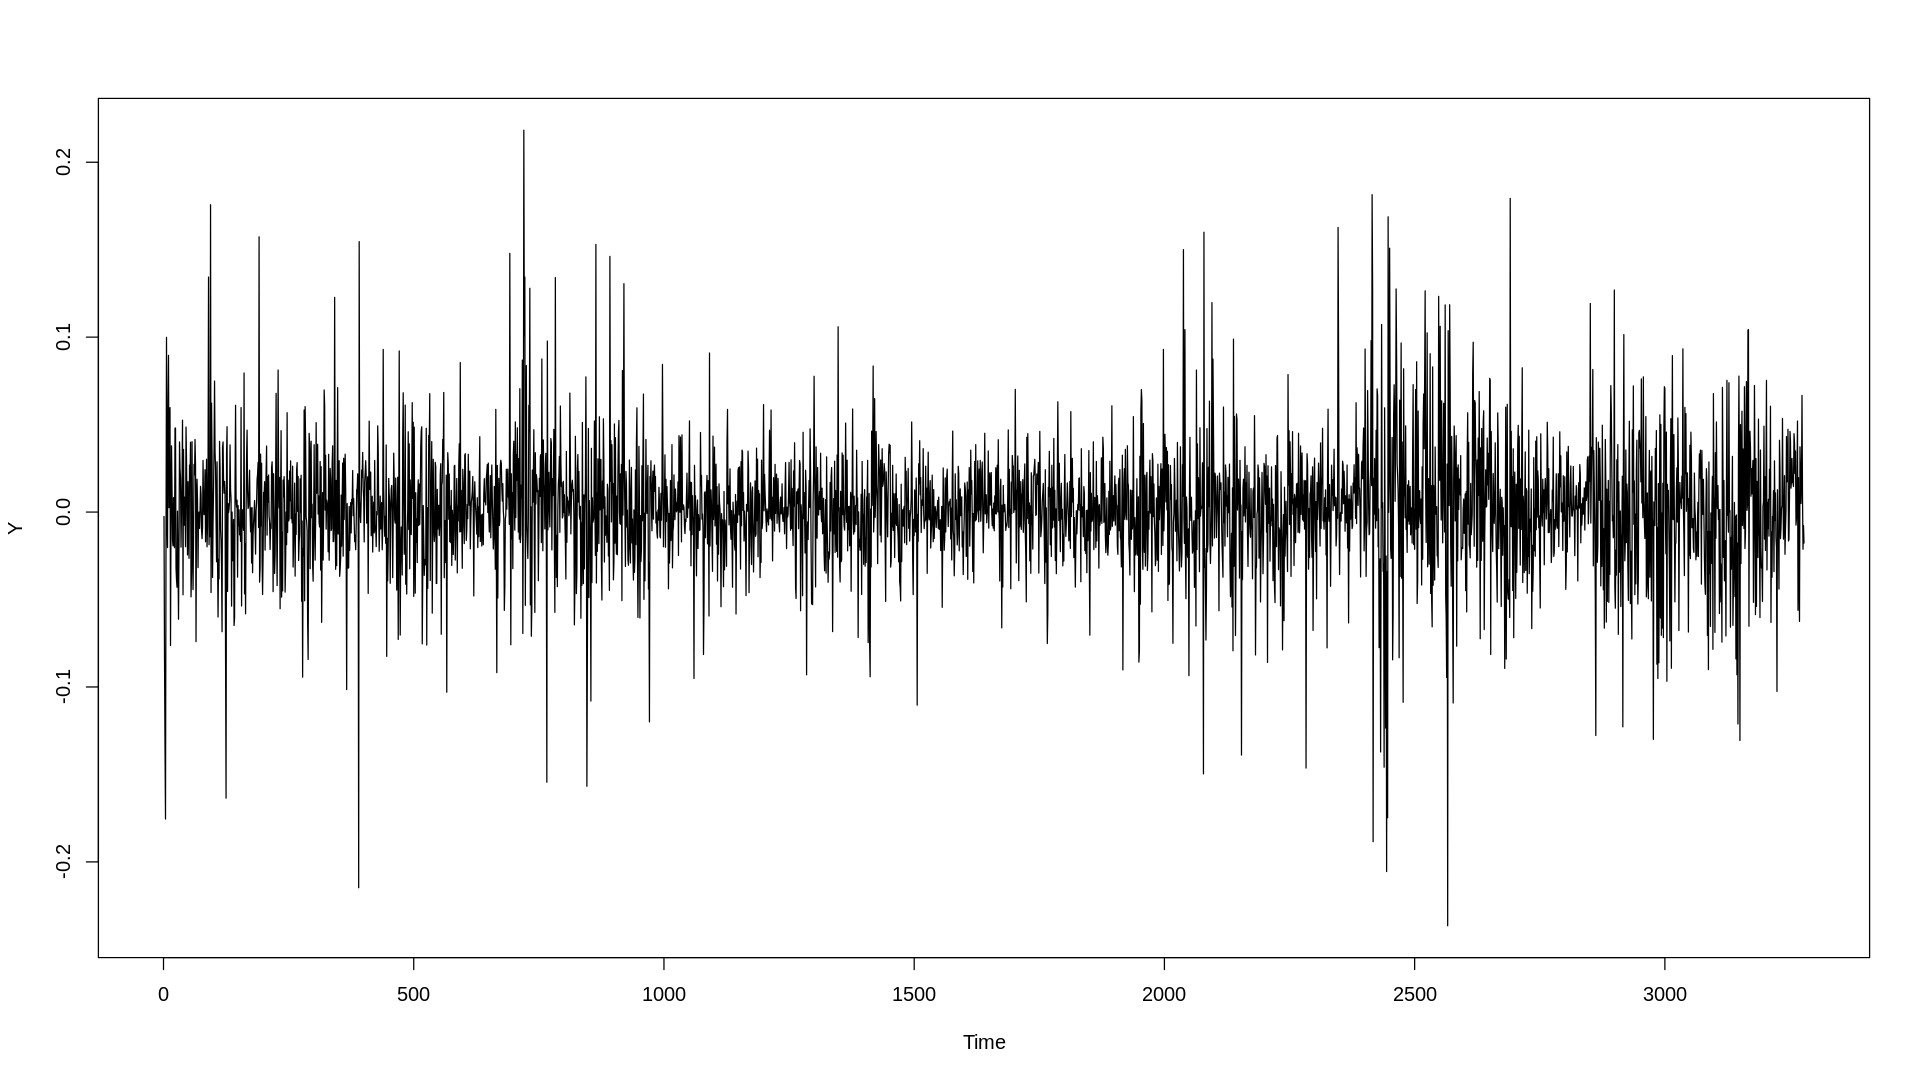

In [ ]:
ts.plot(Y)

Histograma de retornos diarios

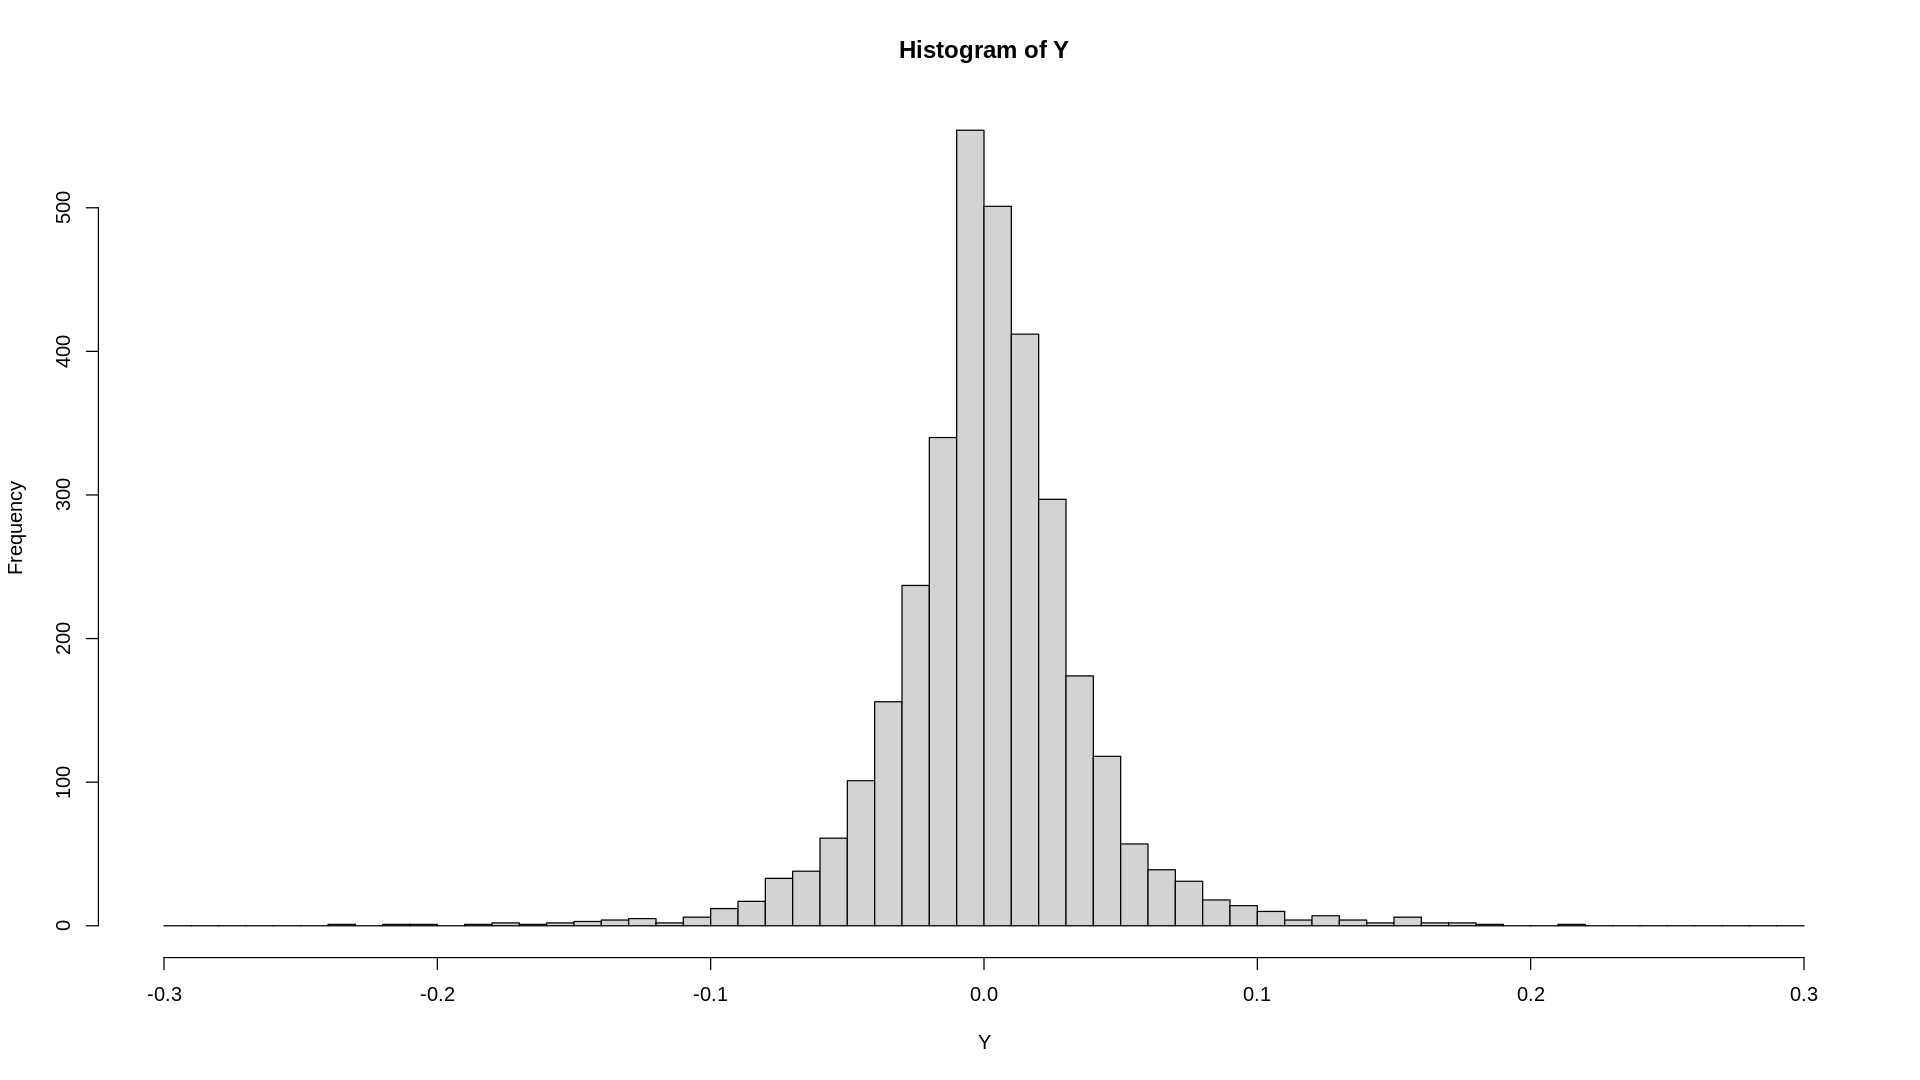

In [ ]:
hist(Y, breaks = seq(-0.3,+0.3, 0.01))

Porcentaje de rentabilidades diarias mayores a 5%

In [ ]:
paste(round(mean(Y > 0.05)*100,2),"%", sep = "")

[1] "6.04%"

Graficos QQ-Norm serie normal (simulada) vs retornos diarios TESLA

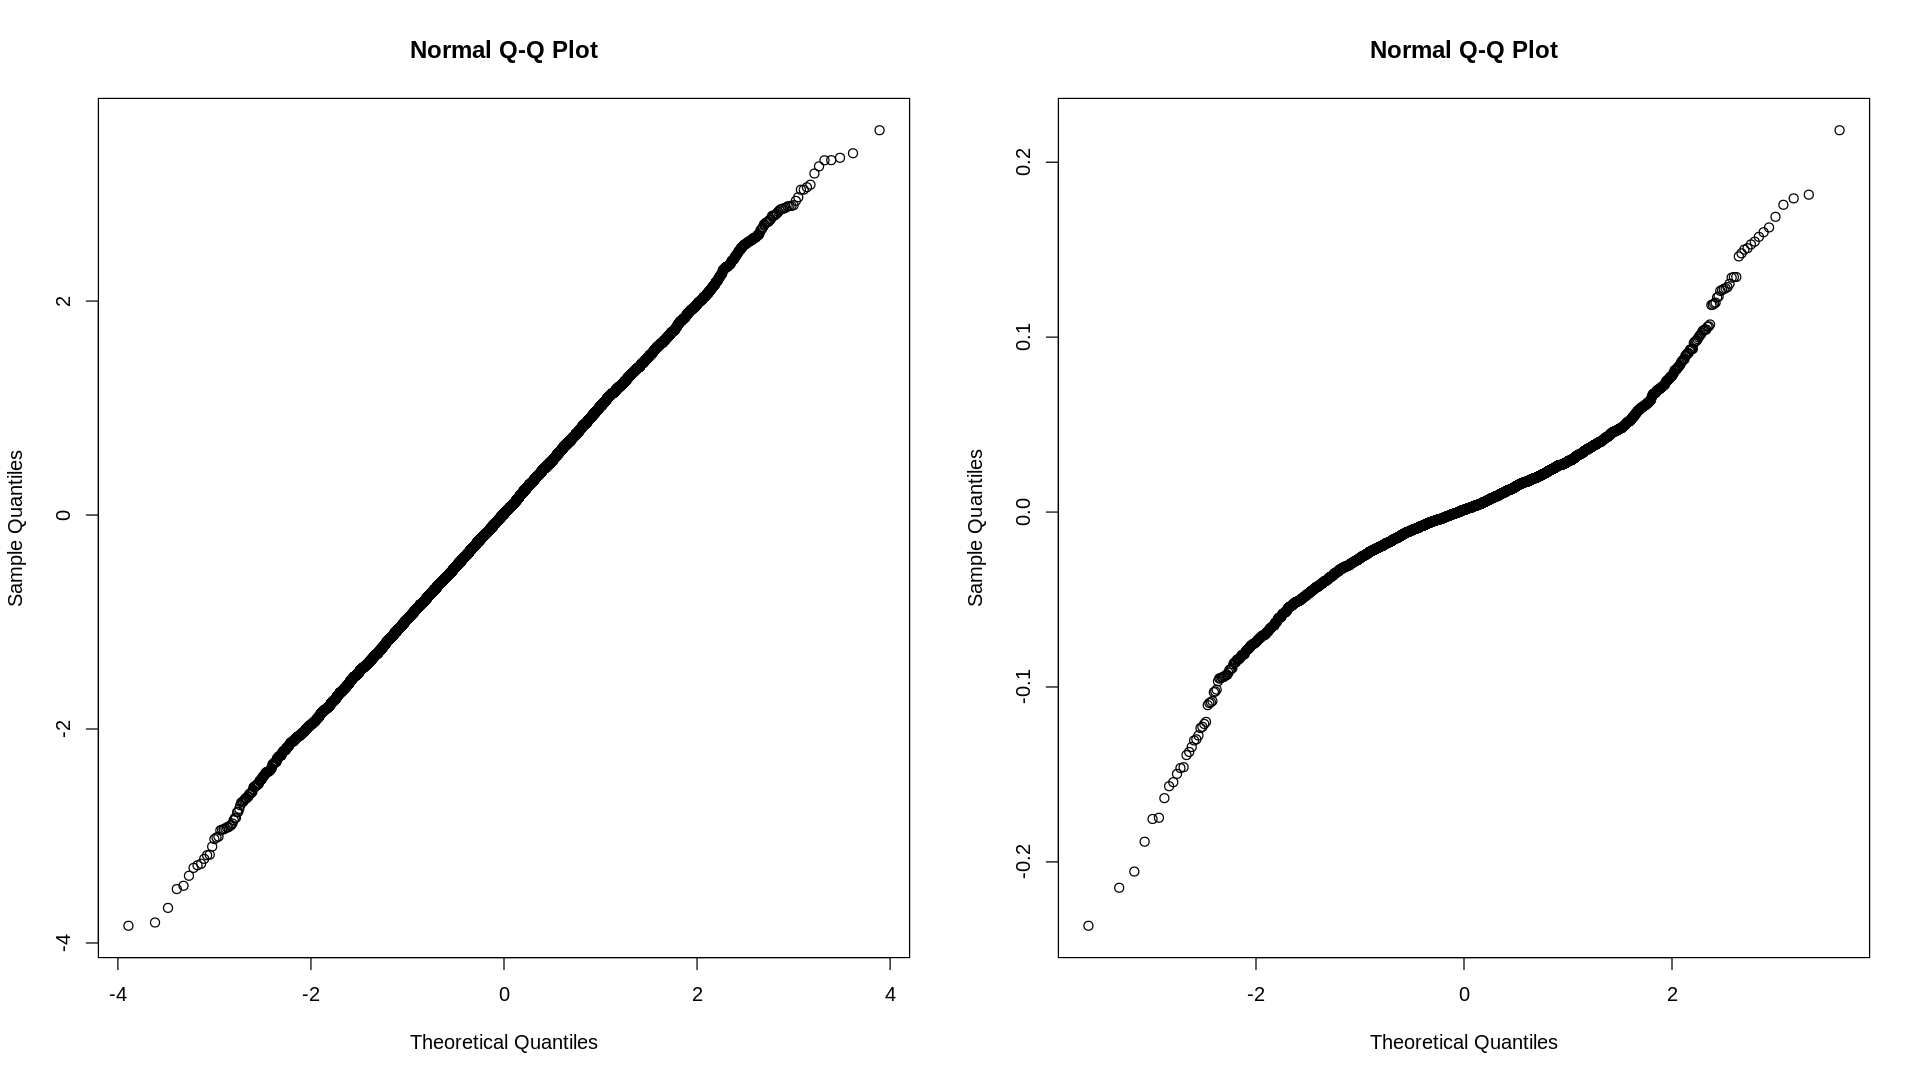

In [ ]:
par(mfrow = c(1,2))
qqnorm(rnorm(10000))
qqnorm(Y)

## Dependencia Serial

ACF: autocorrelación

Se correlación Y[t] vs Y[t+k] que "deberia" ser igual a Y[s] vs Y[s+k]

Caso estacionario
gamma(k) = cov(Y[t], Y[y+k]) --> rho(k) = gamma(k)/gamma(0)

¿Estacionaridad?
1. Media constante
2. Varianza constante
3. ACF no cambia en el tiempo

Ejemplo 2: Datos NO estacionario

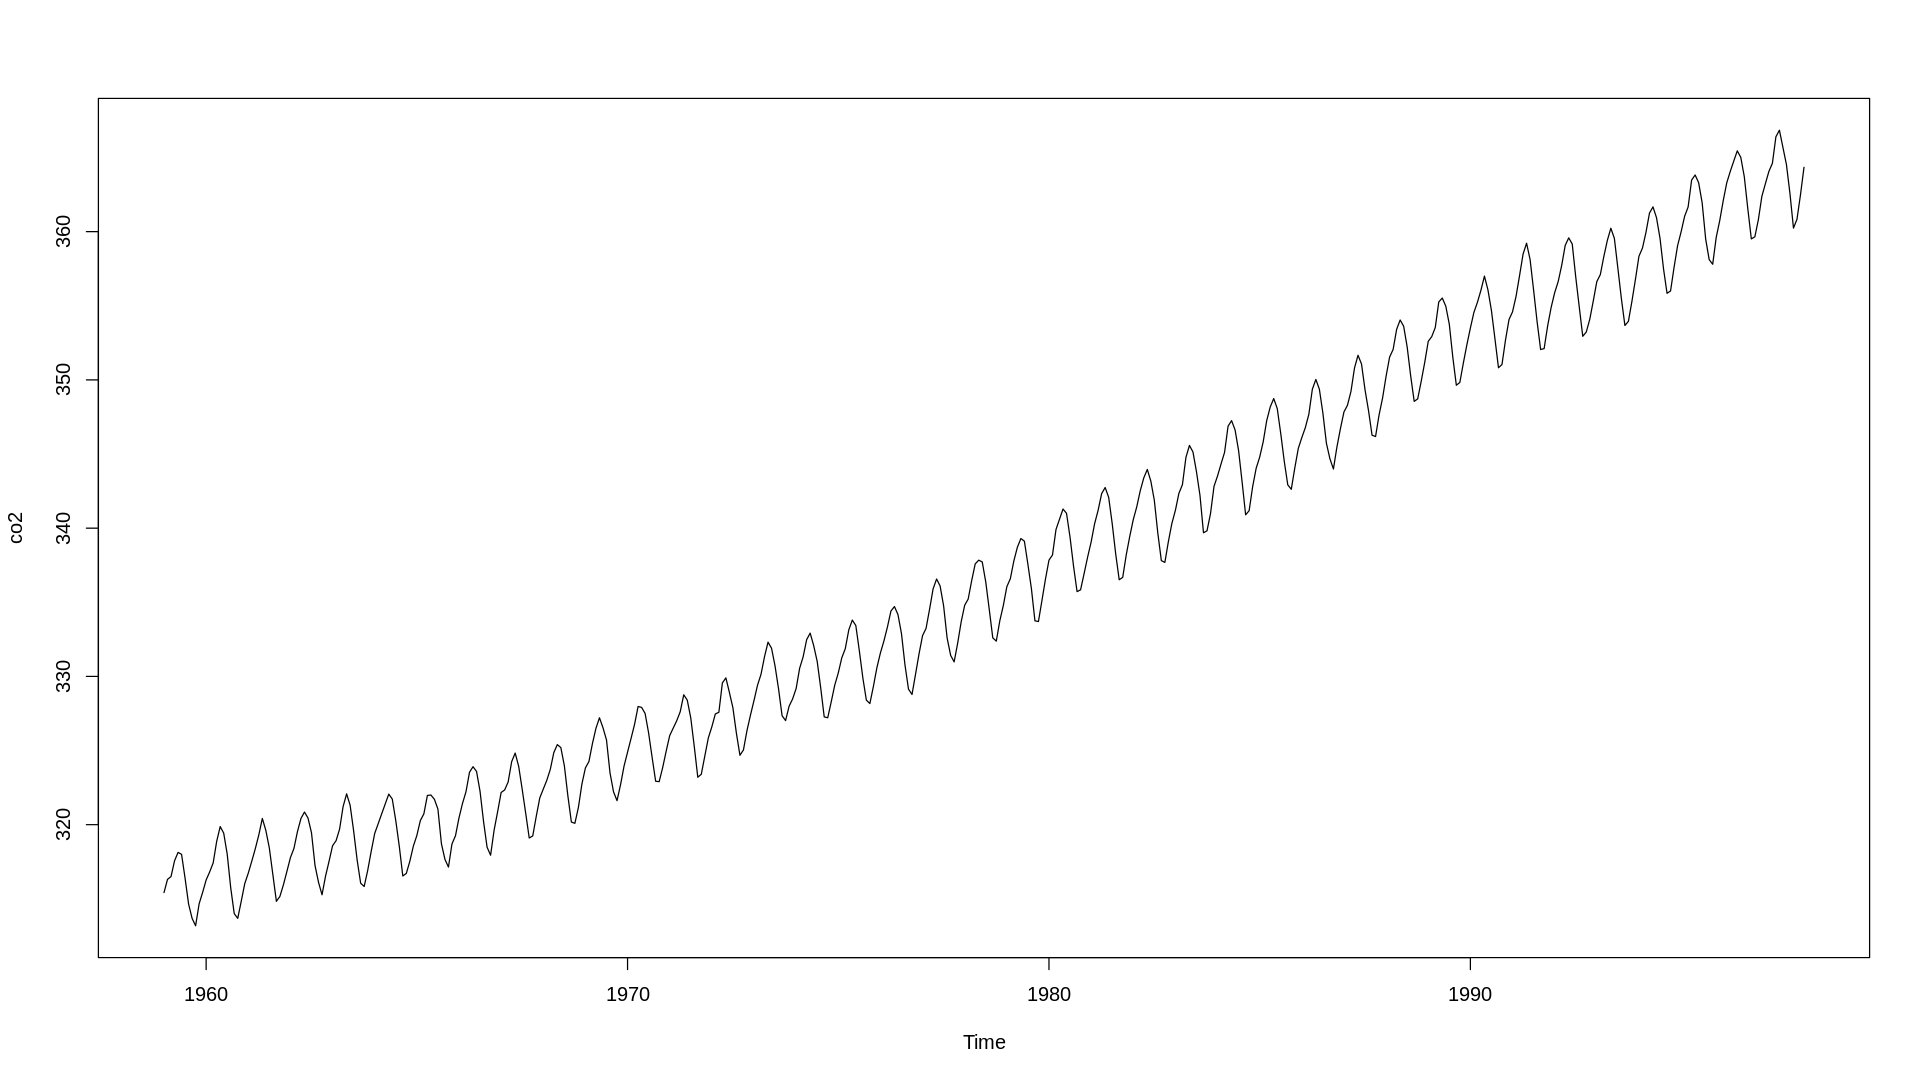

In [ ]:
ts.plot(co2)

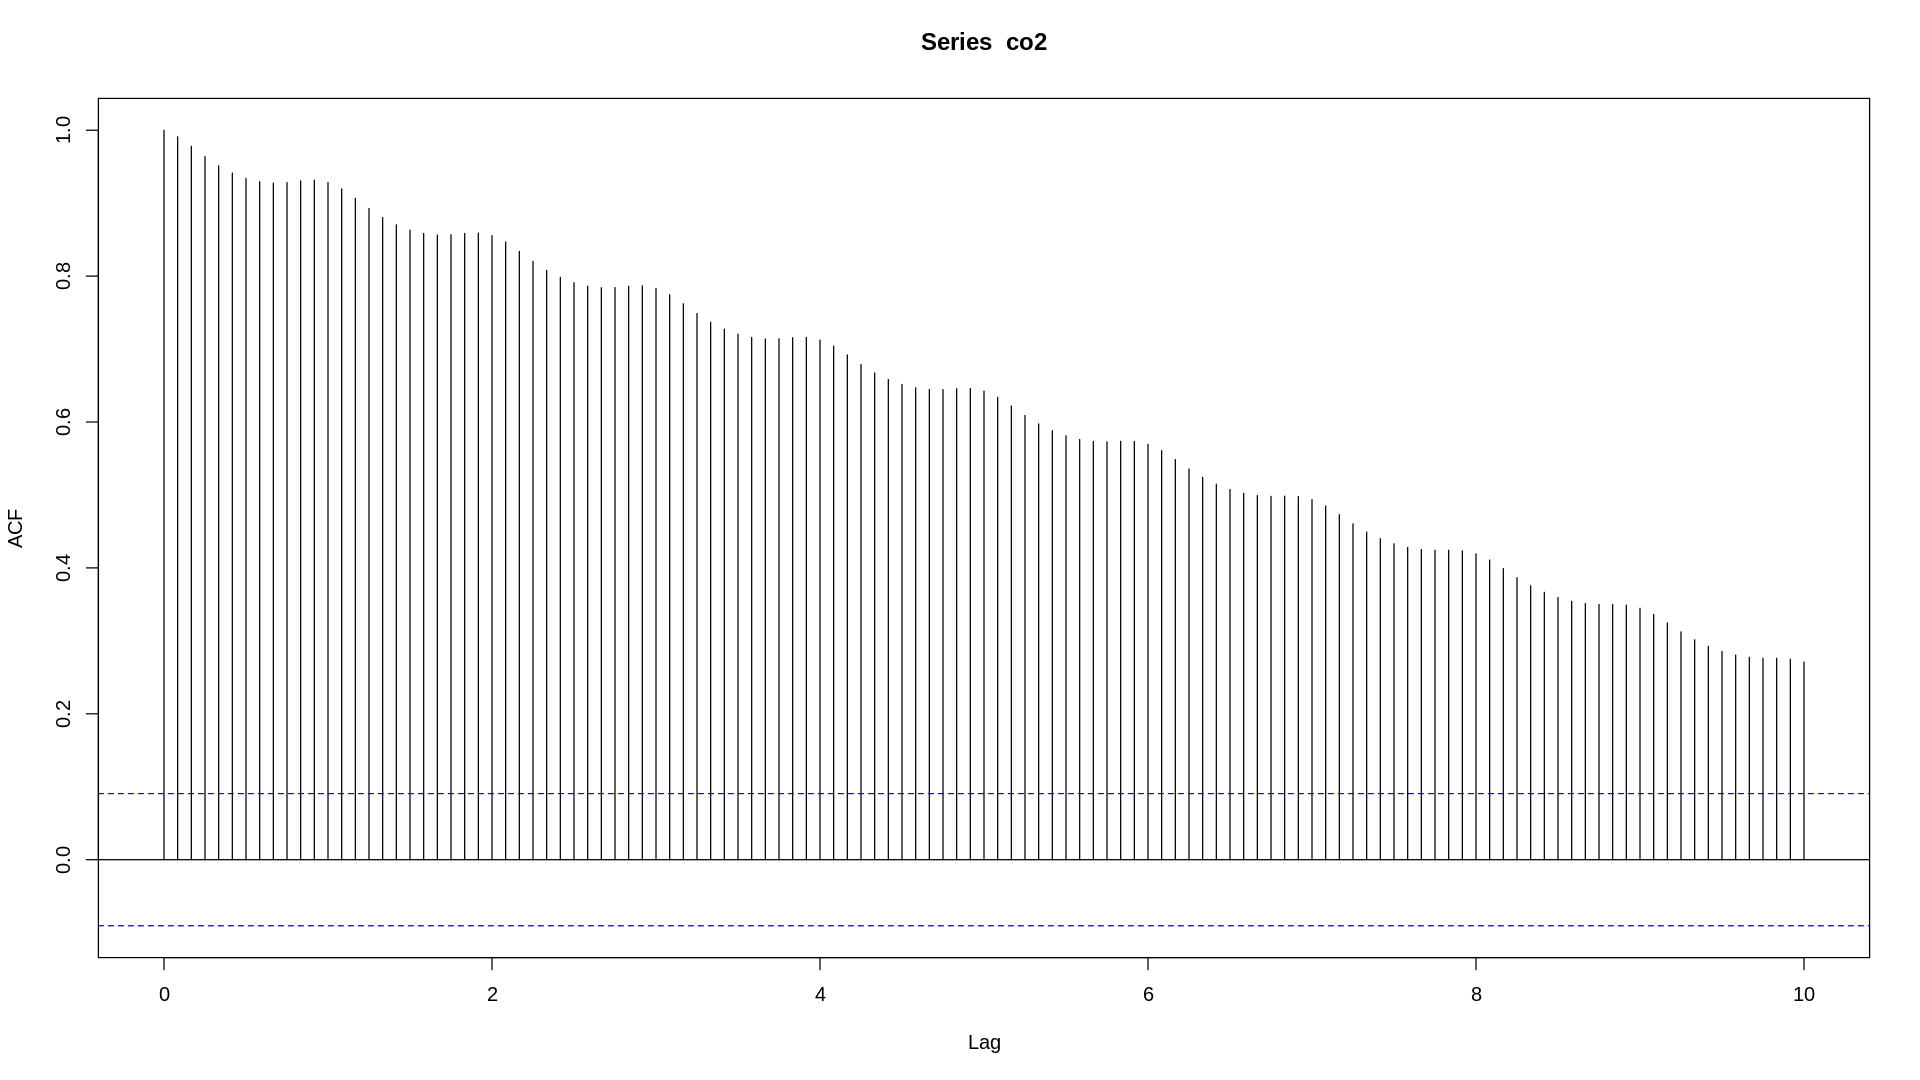

In [ ]:
acf(co2, lag.max = 120)

Ejemplo 3: Datos Estacionarios

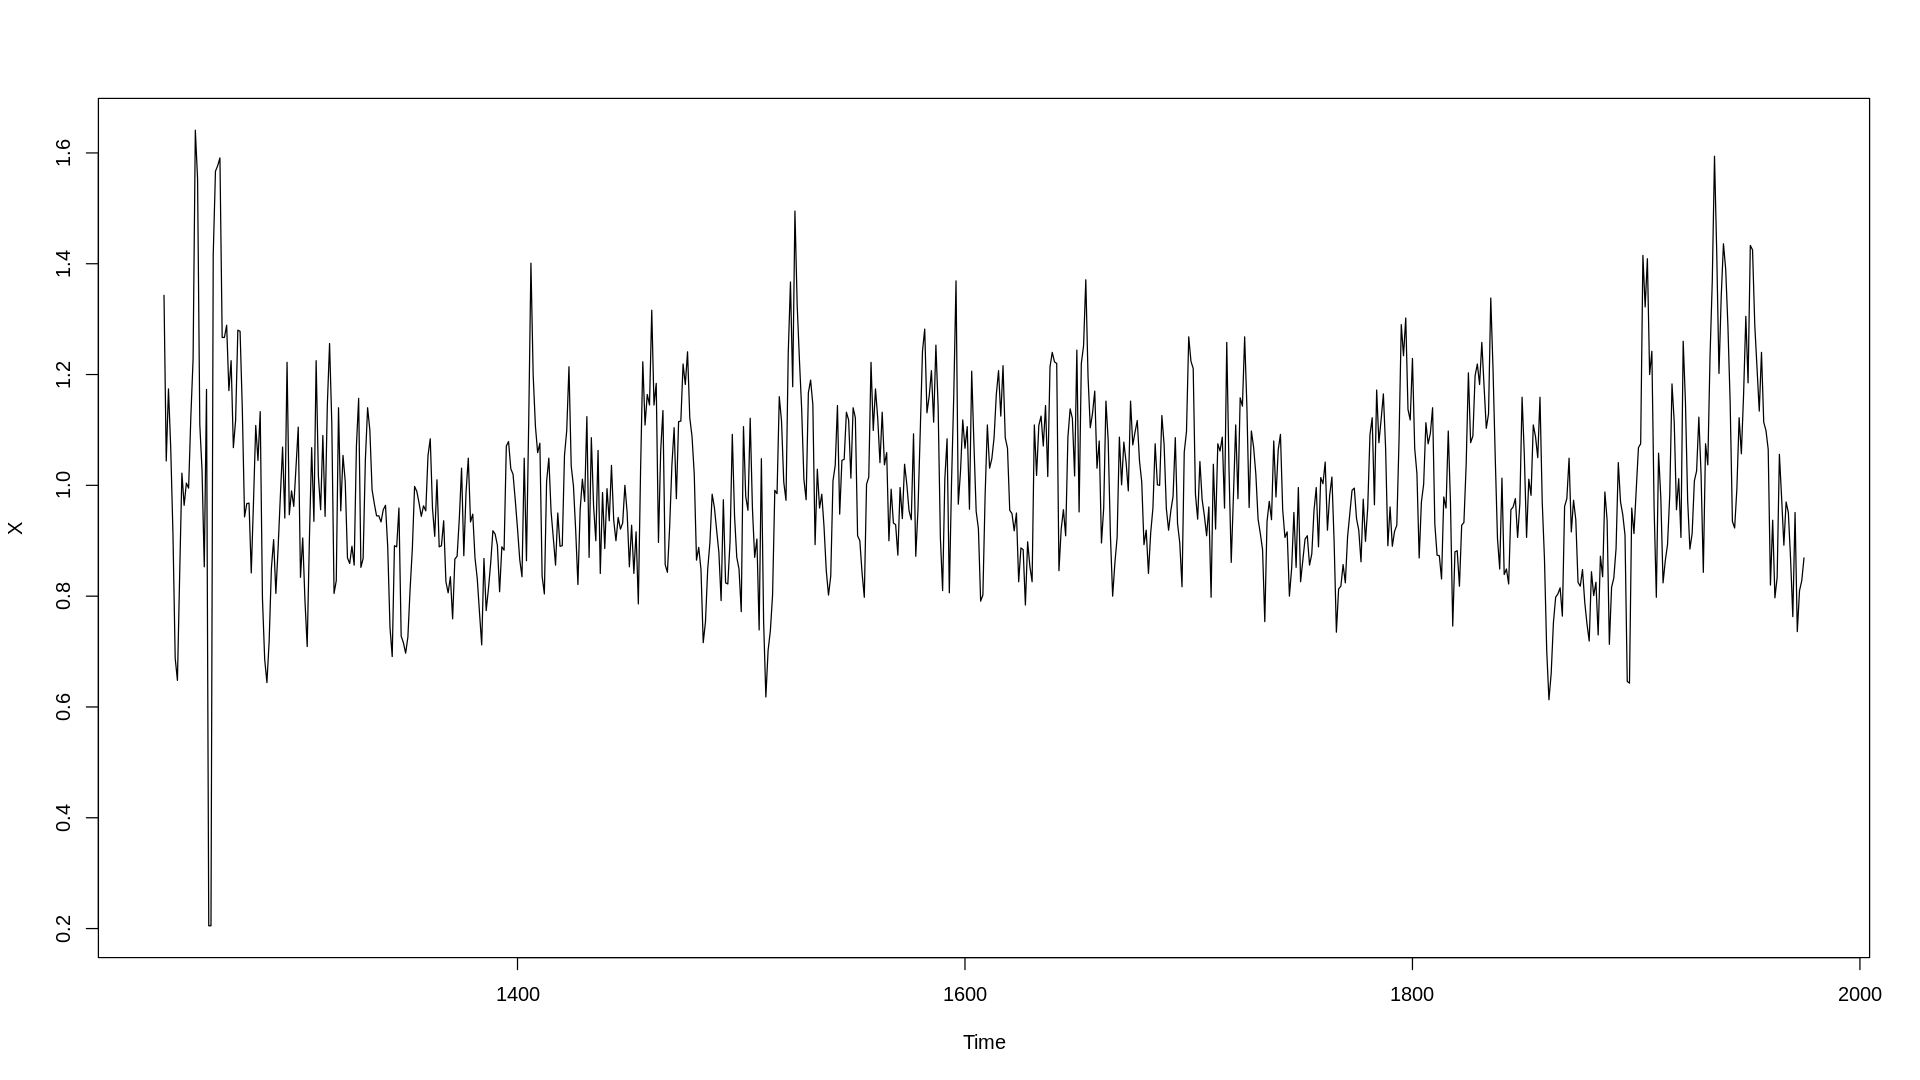

In [ ]:
X <- LSTS::malleco
ts.plot(X)

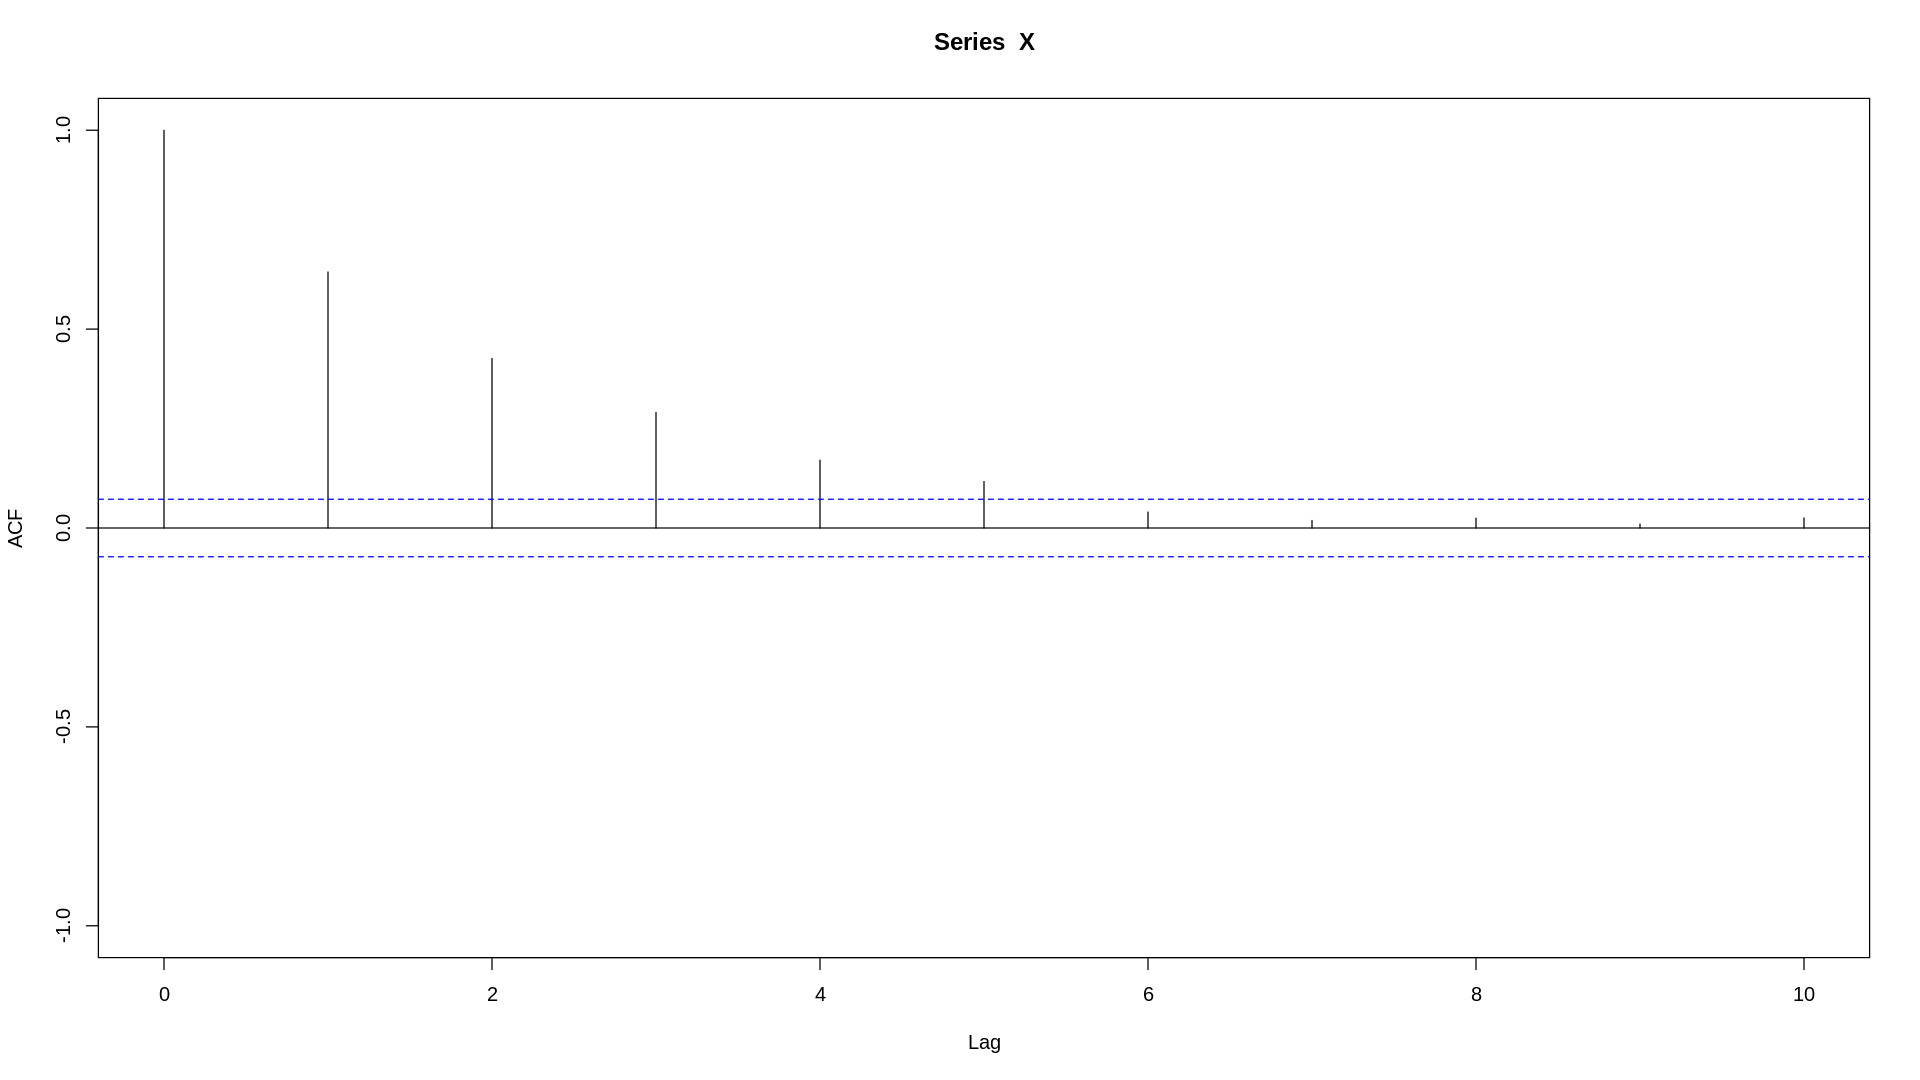

In [ ]:
acf(X, lag.max = 10, ylim = c(-1,+1))

Ejemplo 4: No Estacionario

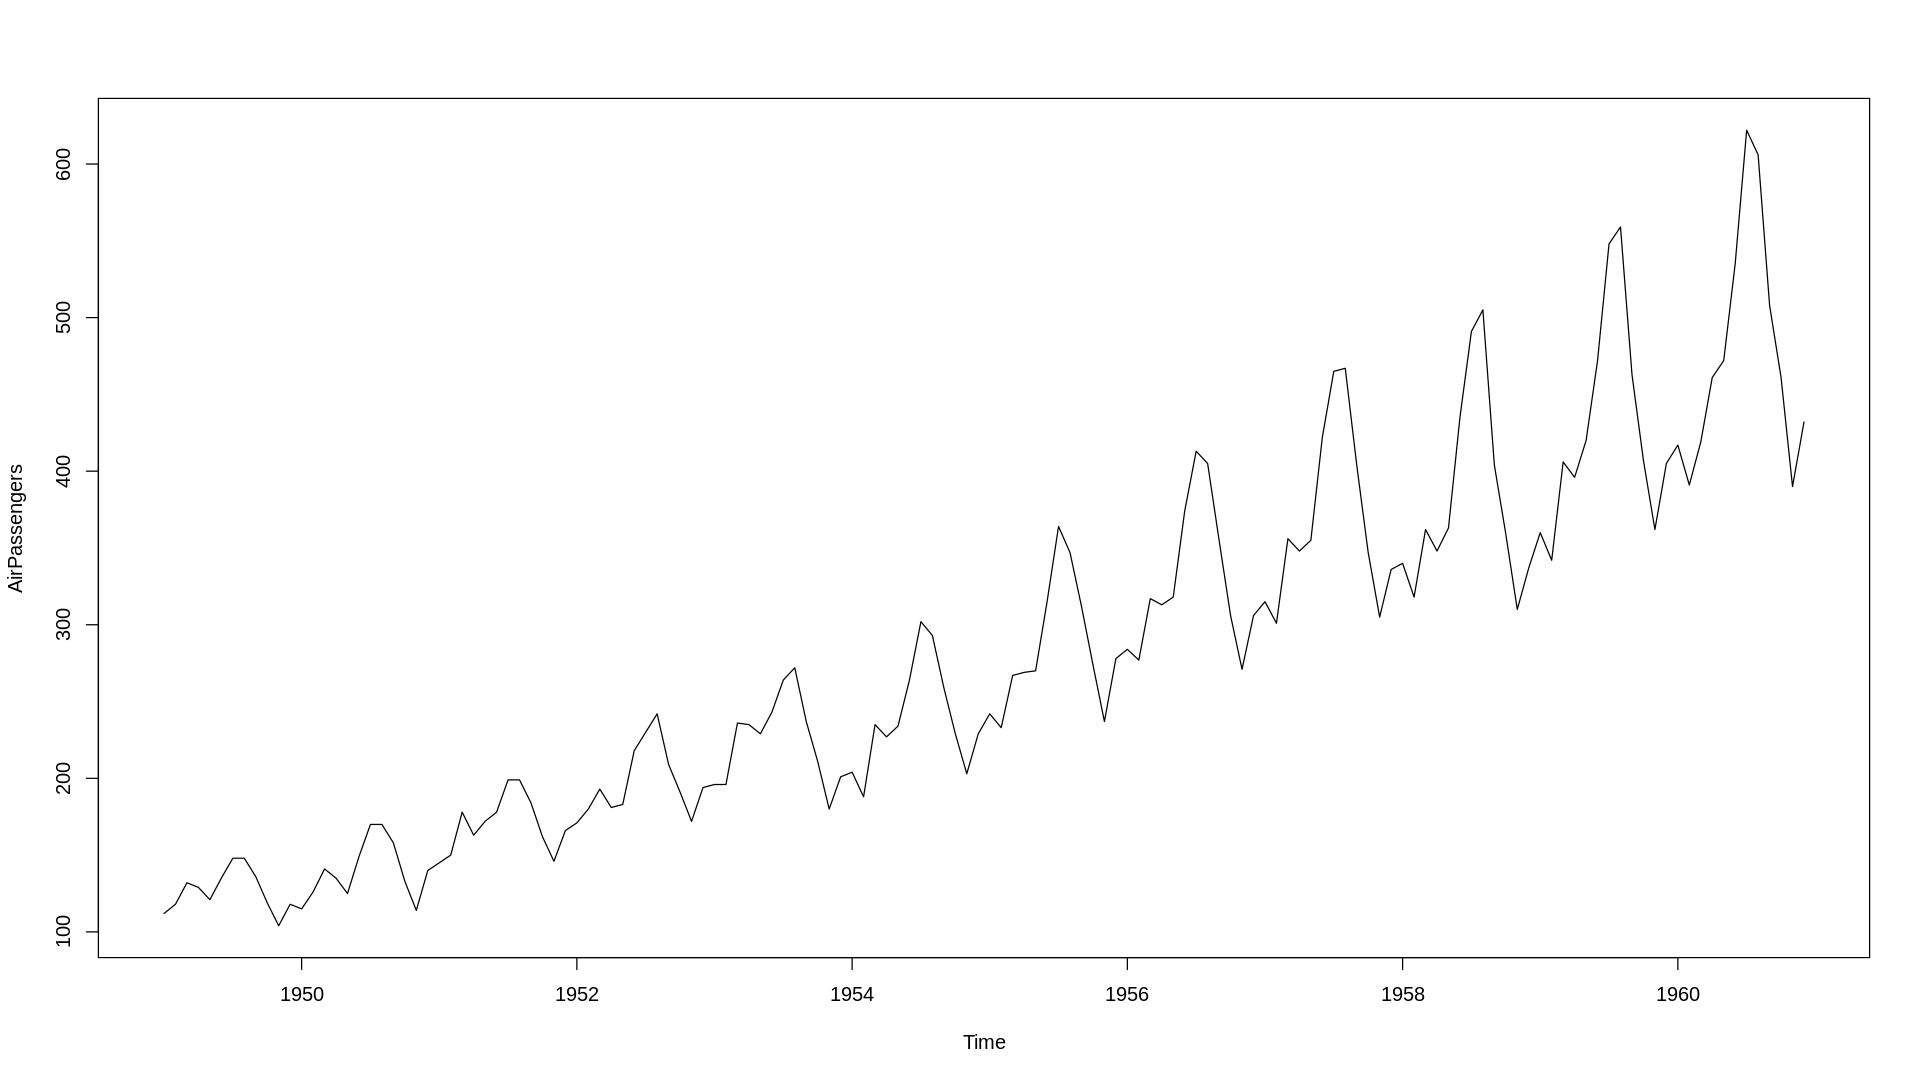

In [ ]:
ts.plot(AirPassengers)

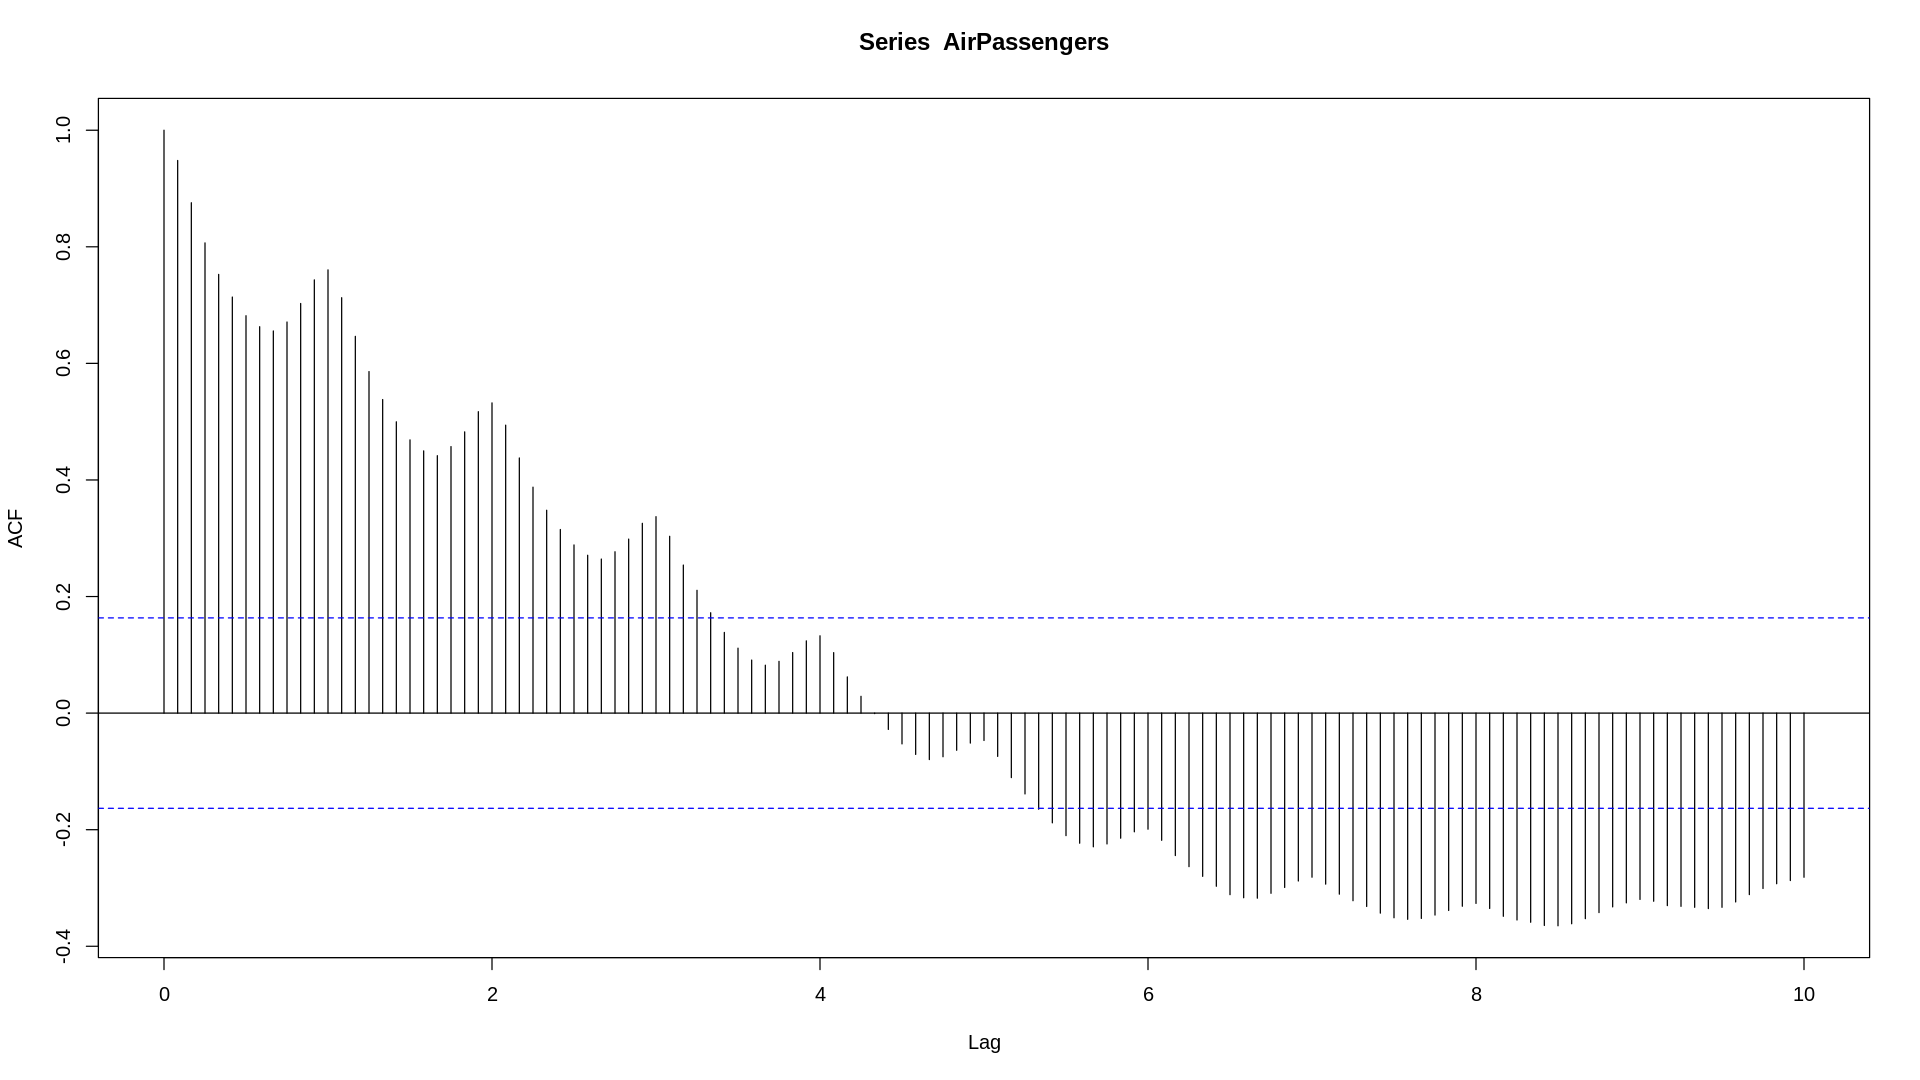

In [ ]:
acf(AirPassengers, lag.max = 120)

## Estabilización de la Varianza

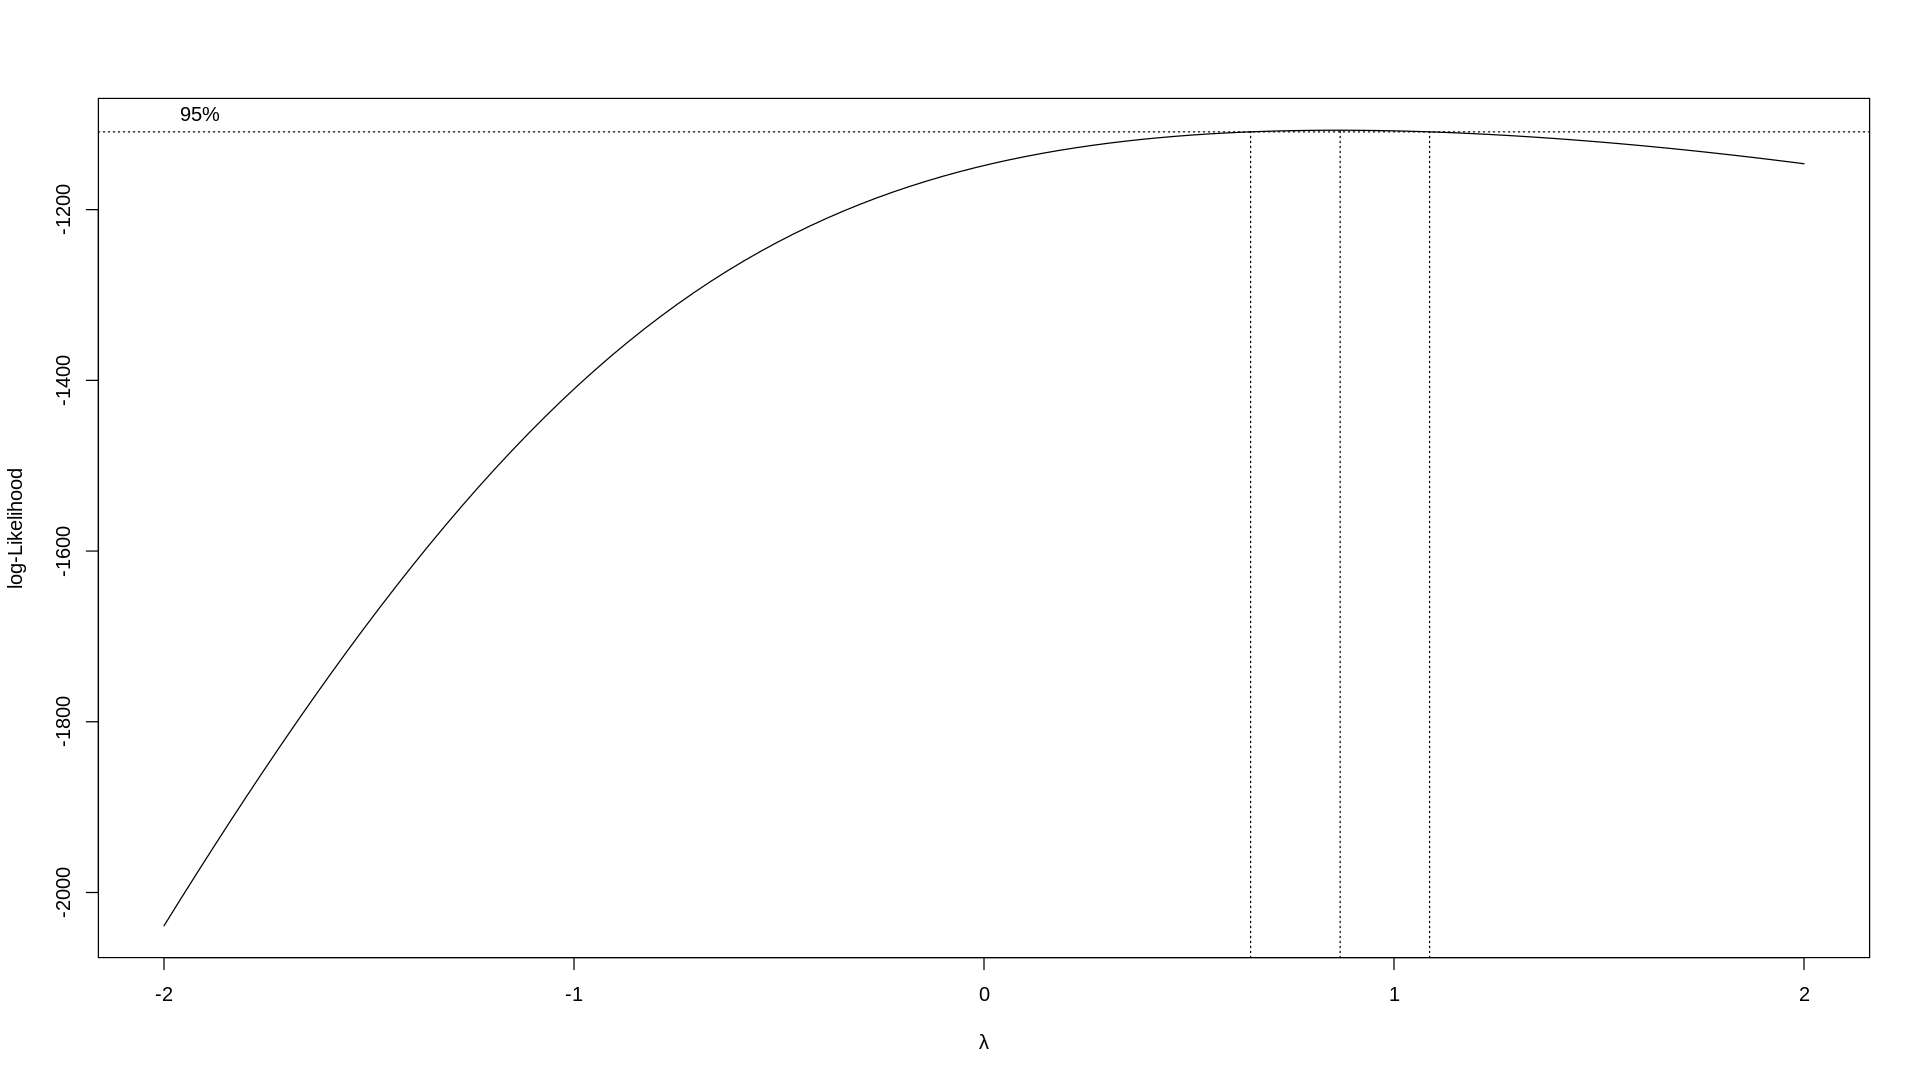

In [ ]:
X <- LSTS::malleco
MASS::boxcox(lm(X ~ time(X)))

Como la pontencia 1 se encuentra en el IC --> No se recomienda transformar

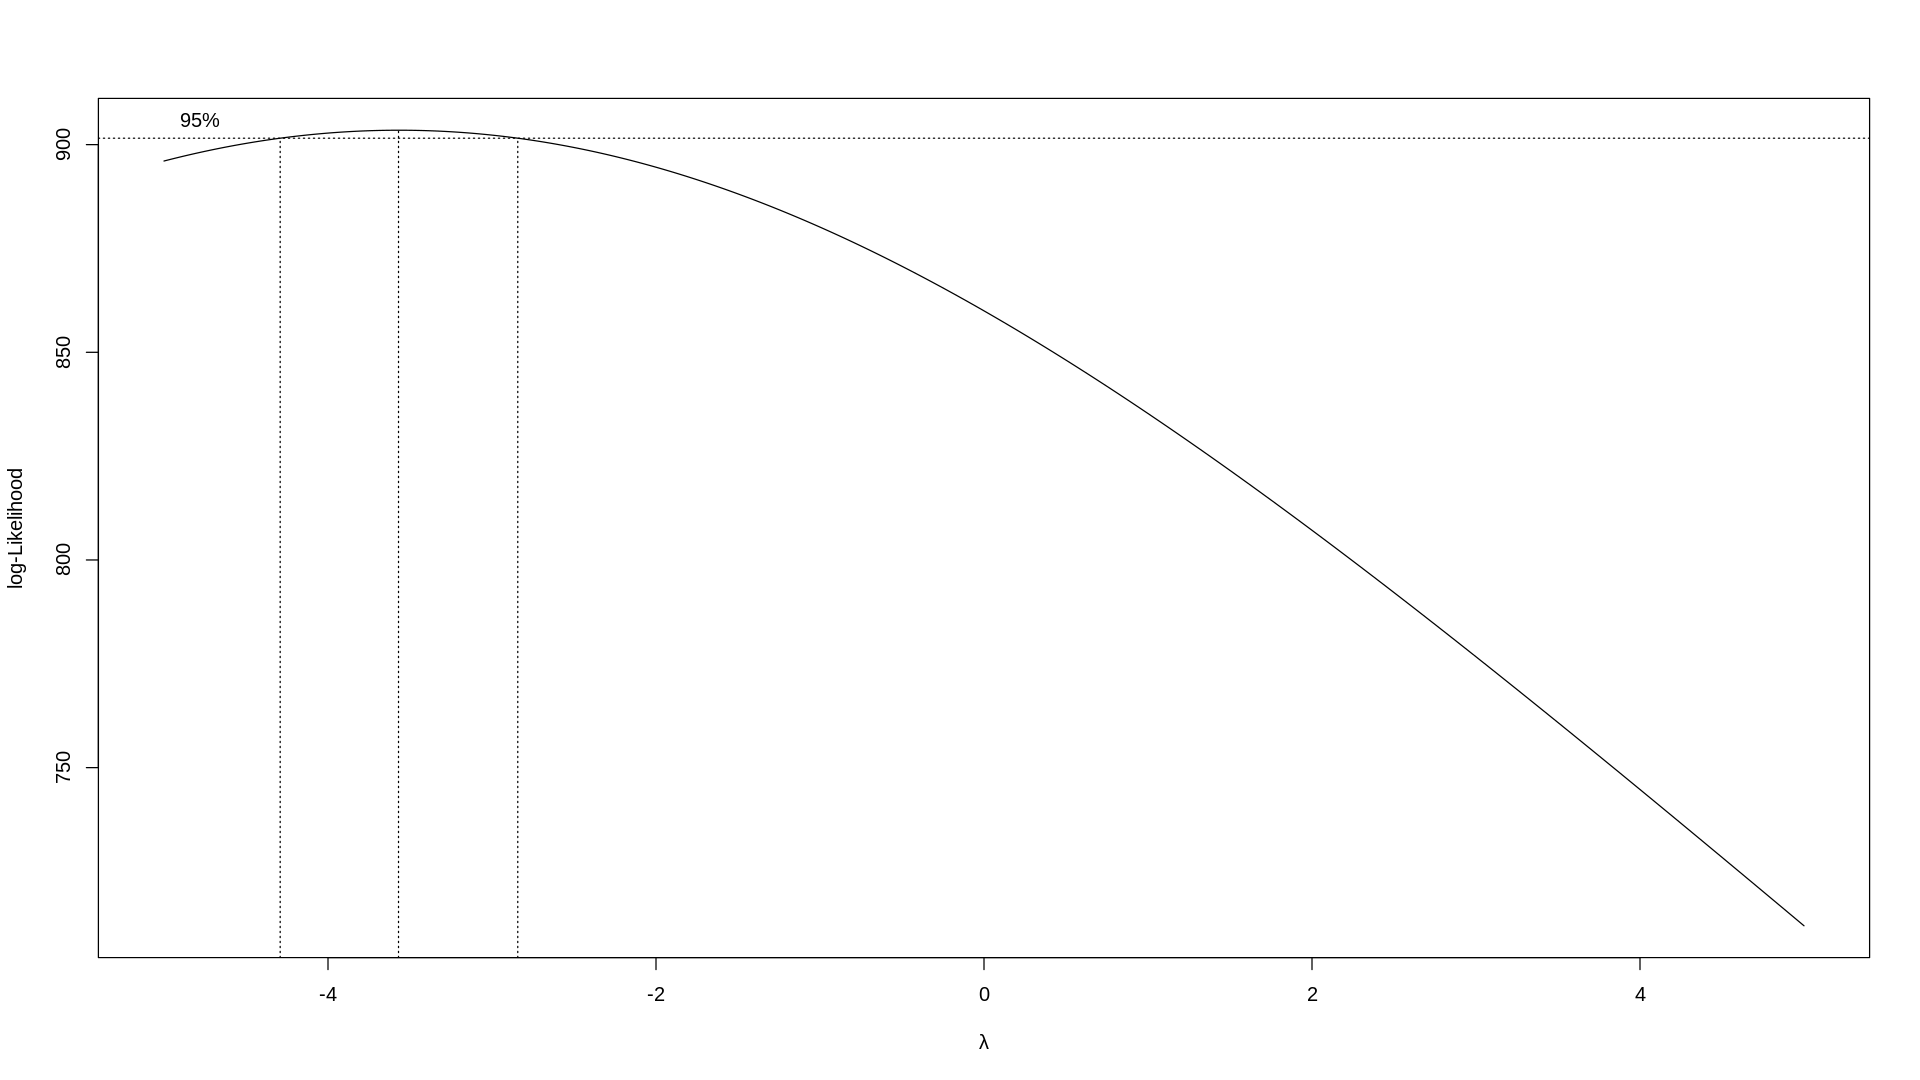

In [ ]:
X <- co2
MASS::boxcox(lm(X~time(X)), lambda = seq(-5,+5,0.01))

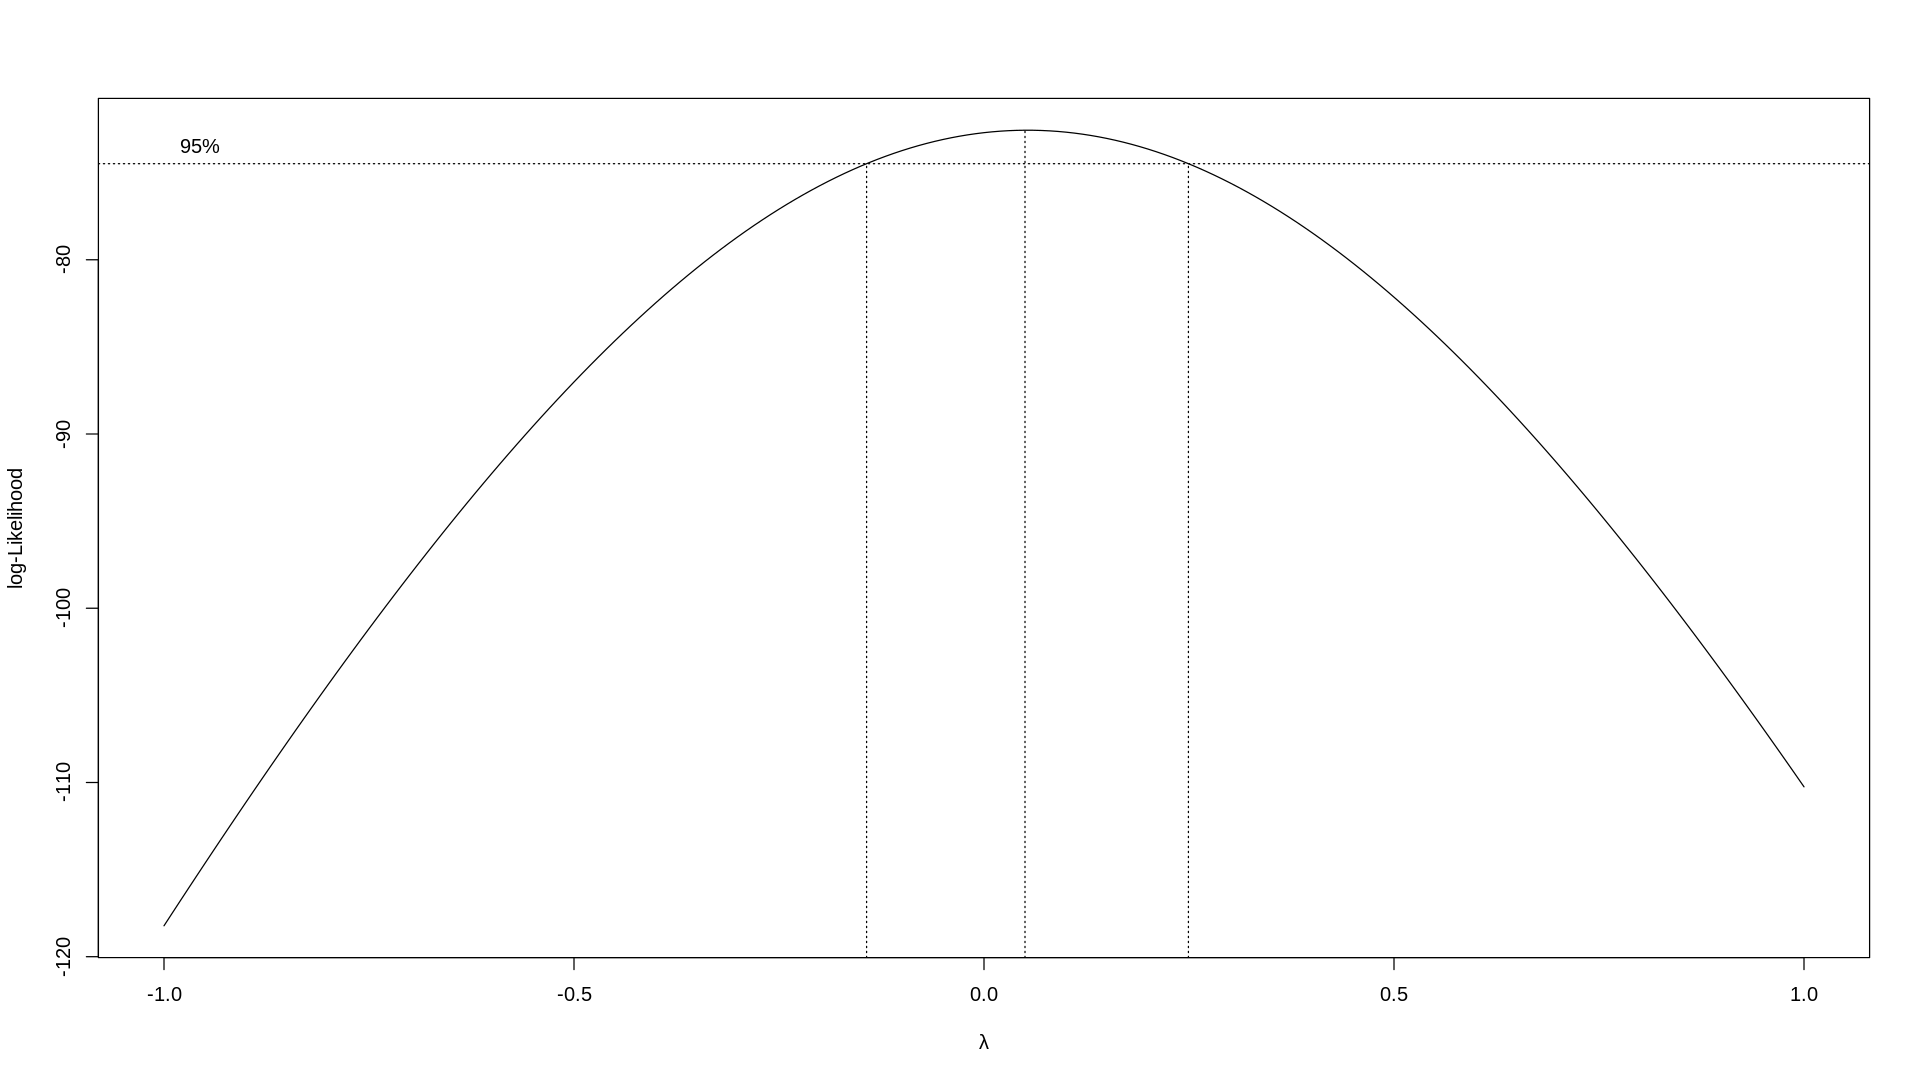

In [ ]:
X <- AirPassengers
MASS::boxcox(lm(X~time(X)), lambda = seq(-1,+1,0.01))

En este caso como el 0 se encuentra en el IC --> Podríamos por simplicidad aplicar log(...)

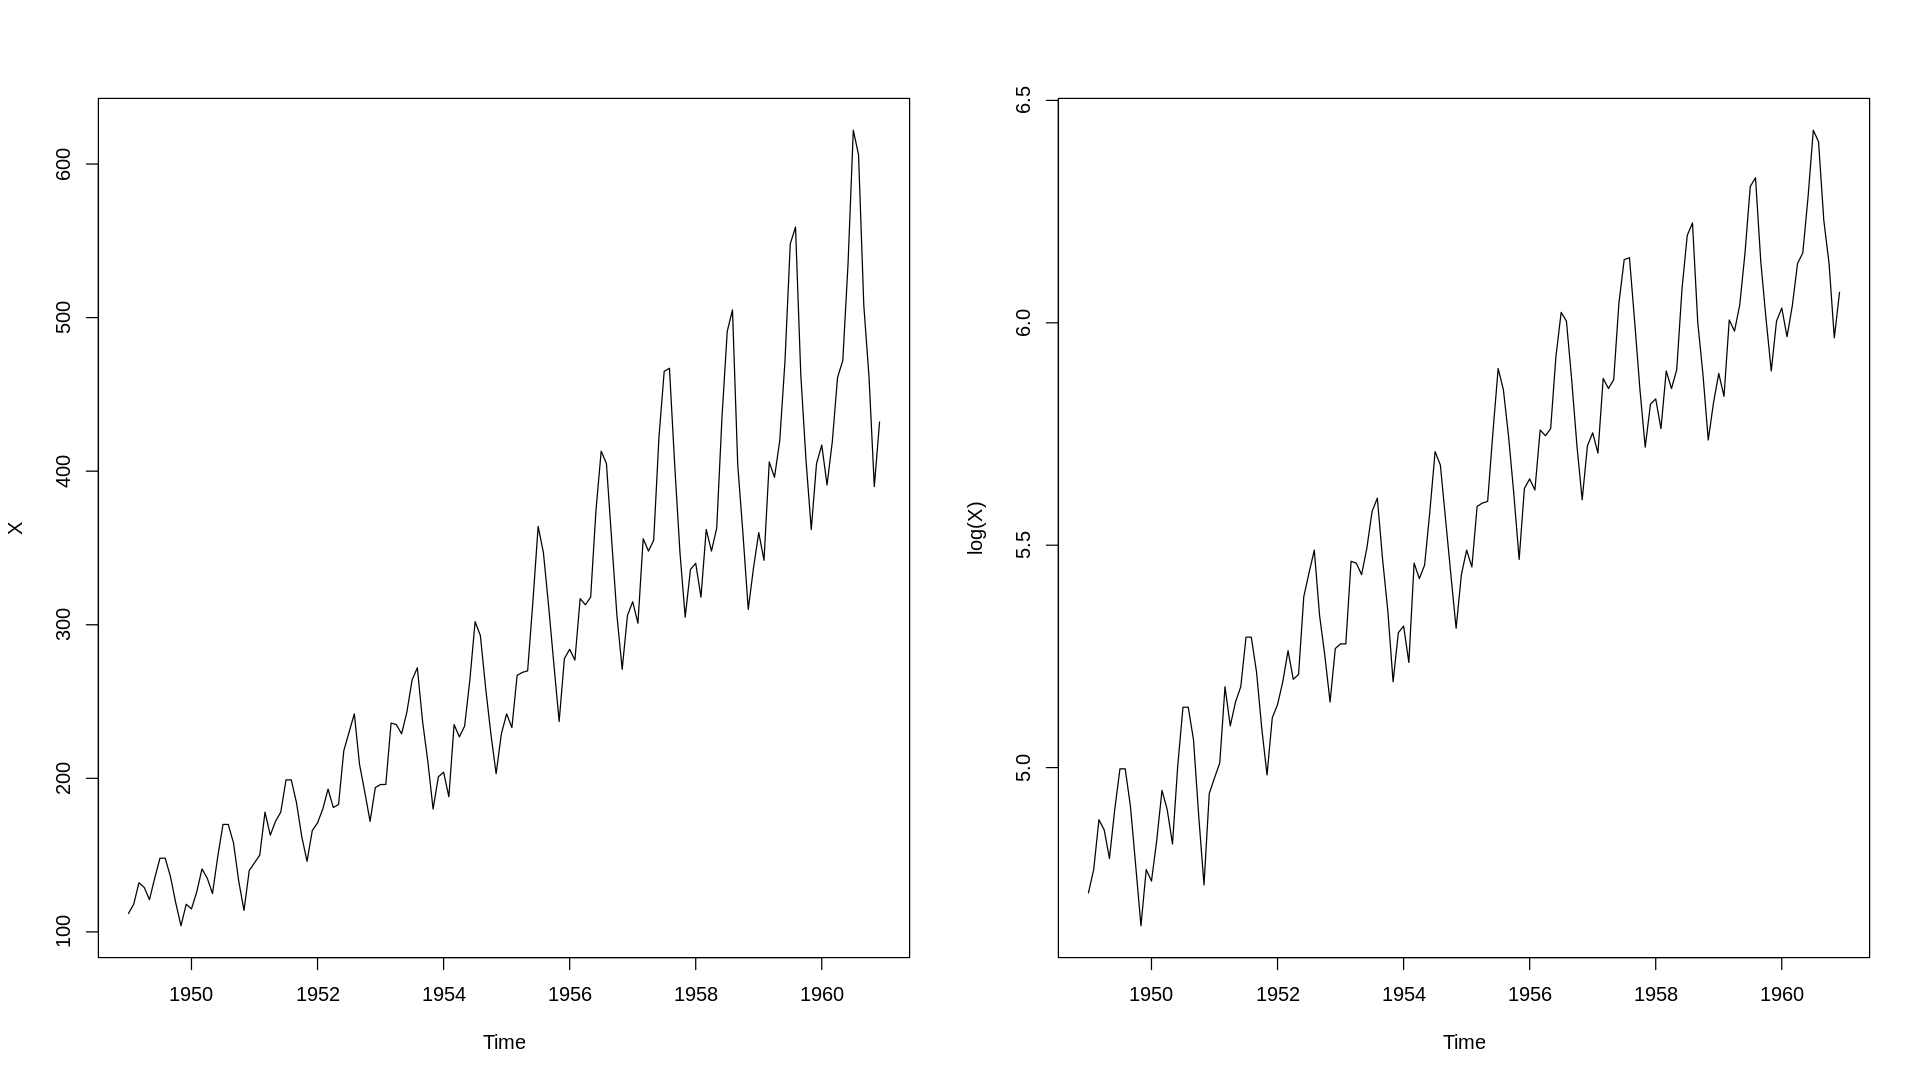

In [ ]:
par(mfrow = c(1,2))
ts.plot(X)
ts.plot(log(X))

Eliminación de la Tendencia y Estacionalidad mediante regresión: lineal o no lineal

In [ ]:
Data <- data.frame(Y = log(c(AirPassengers)), tiempo = c(time(AirPassengers)), drift = 1:length(AirPassengers))

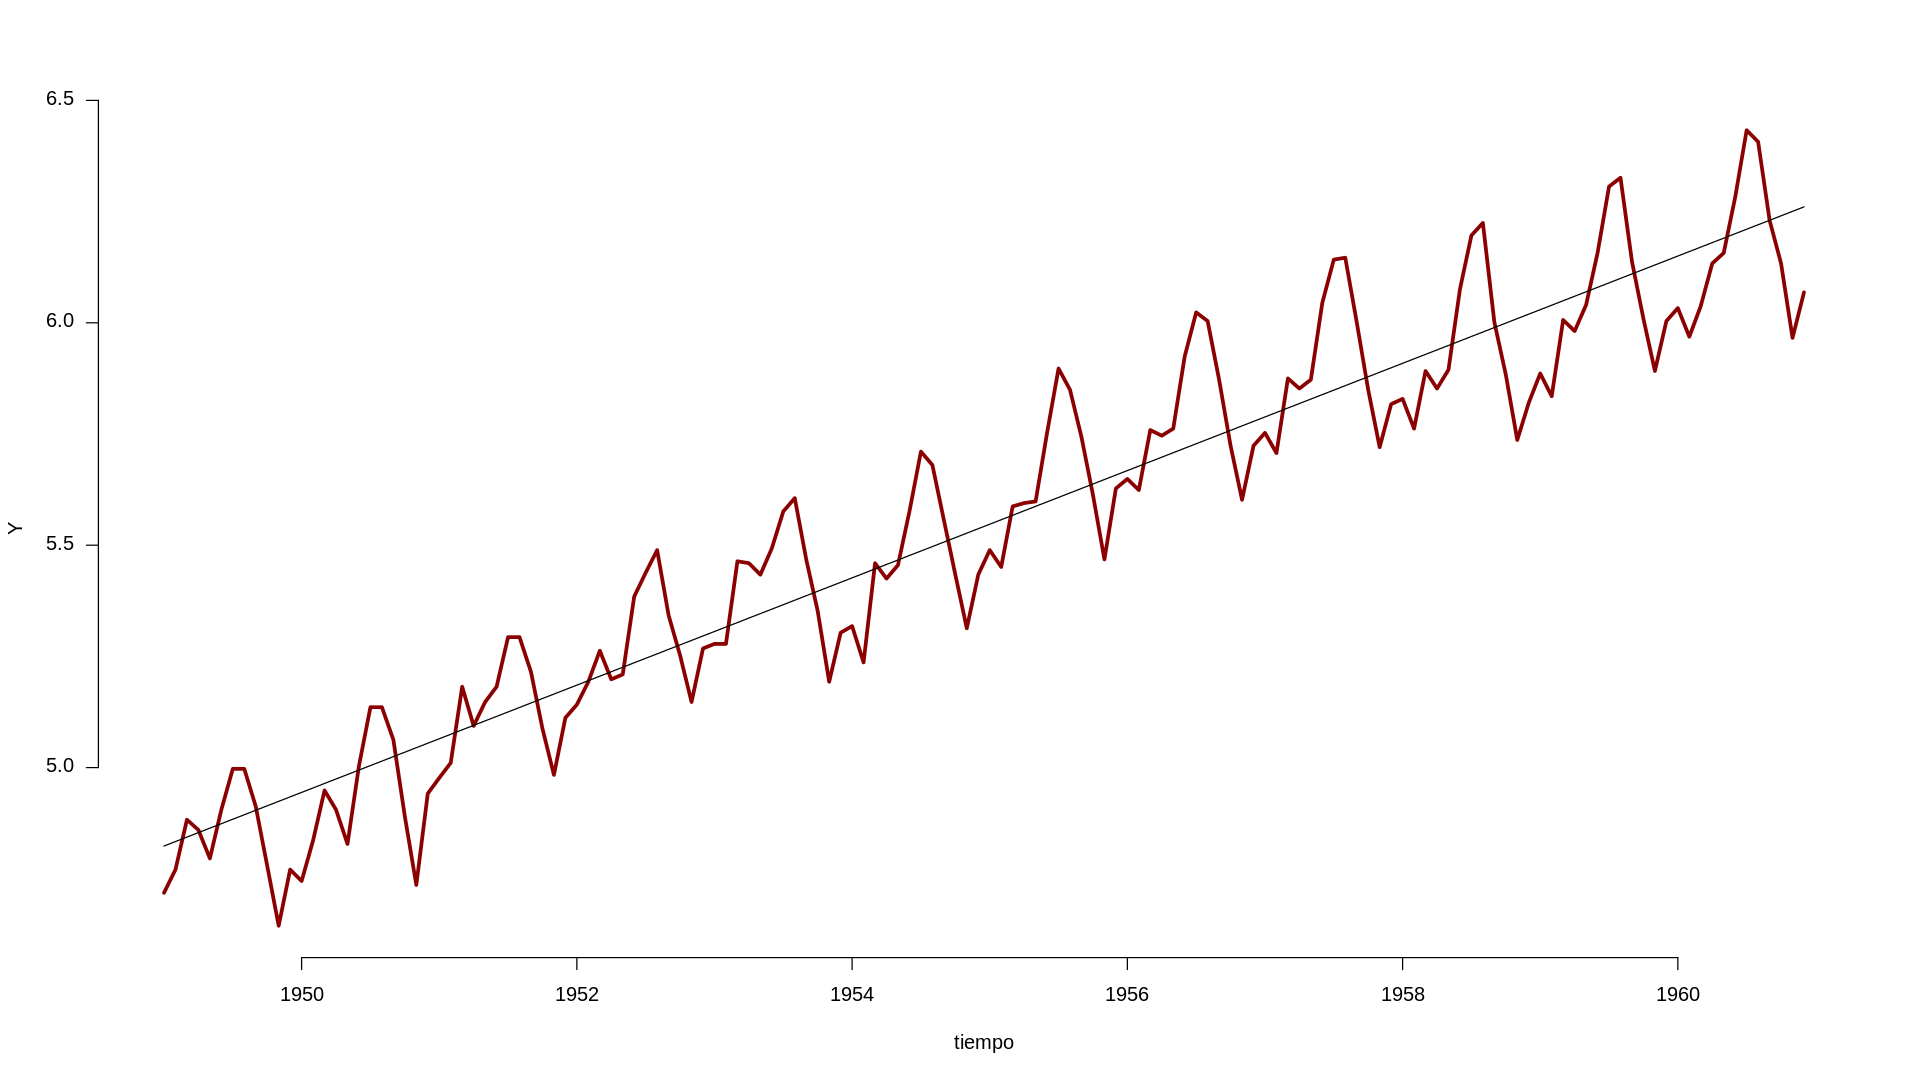

In [ ]:
modelo1 <- lm(Y ~ drift, data = Data)
plot(Y ~ tiempo, data = Data, type = "l", lwd = 3, col = "darkred", bty = "n", las = 1)
lines(modelo1$fitted.values~Data$tiempo)

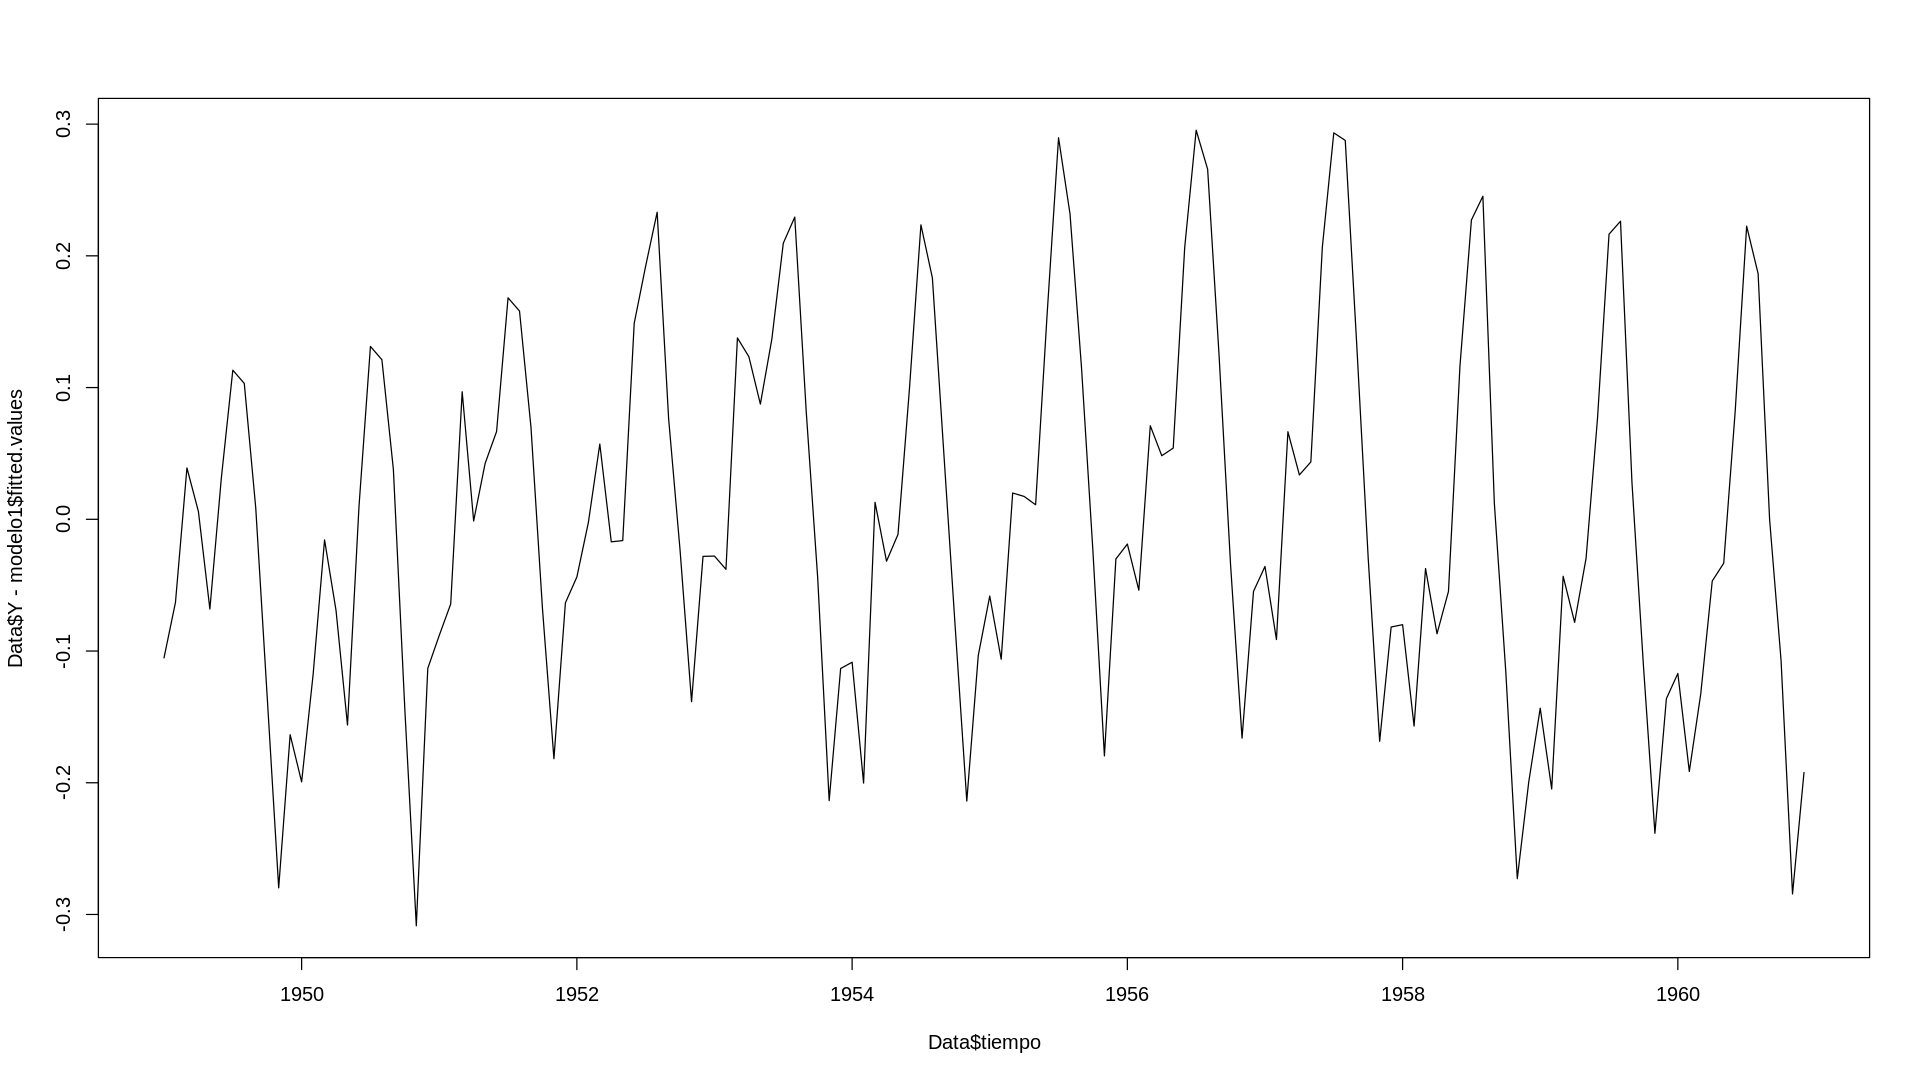

In [ ]:
plot(Data$Y - modelo1$fitted.values ~ Data$tiempo, type = "l")

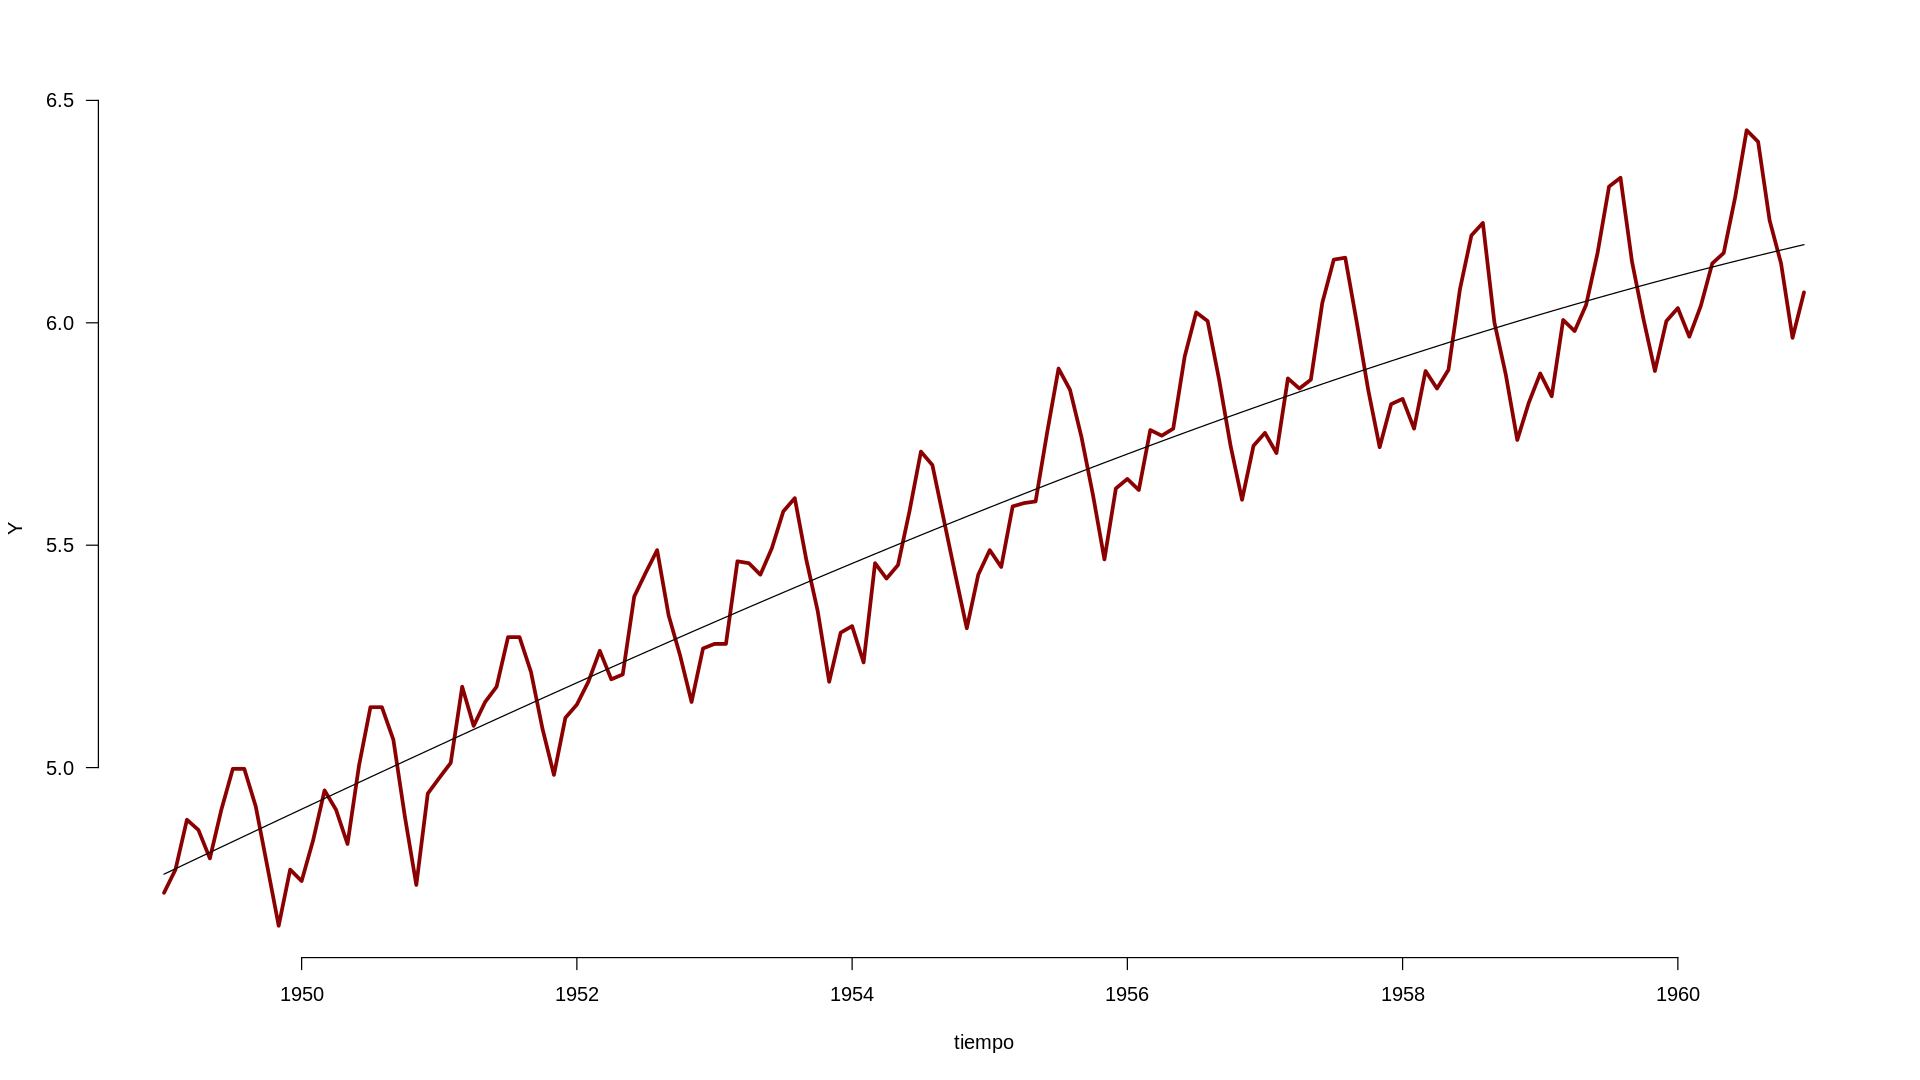

In [ ]:
modelo2 <- lm(Y ~ I(drift)+I(drift^2)+I(drift^3), data = Data)
plot(Y ~ tiempo, data = Data, type = "l", lwd = 3, col = "darkred", bty = "n", las = 1)
lines(modelo2$fitted.values~Data$tiempo)

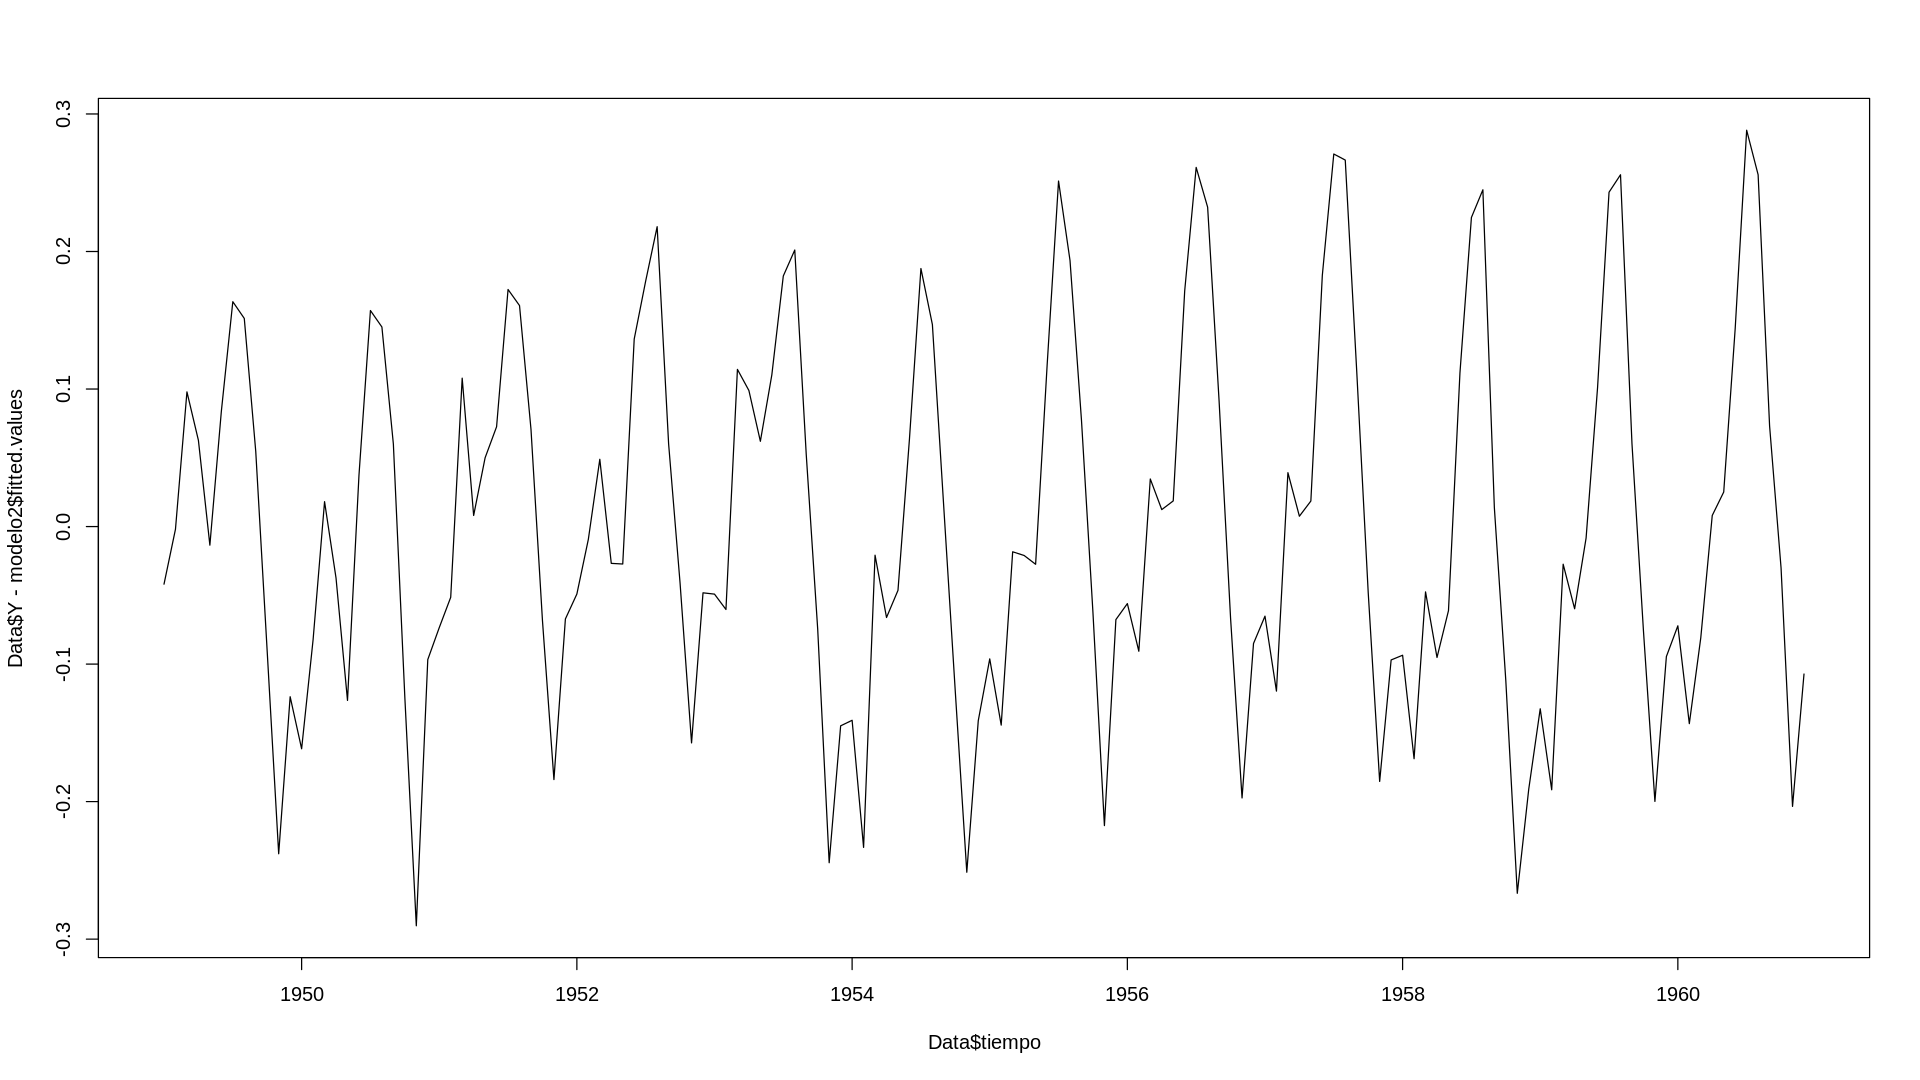

In [ ]:
plot(Data$Y - modelo2$fitted.values ~ Data$tiempo, type = "l")

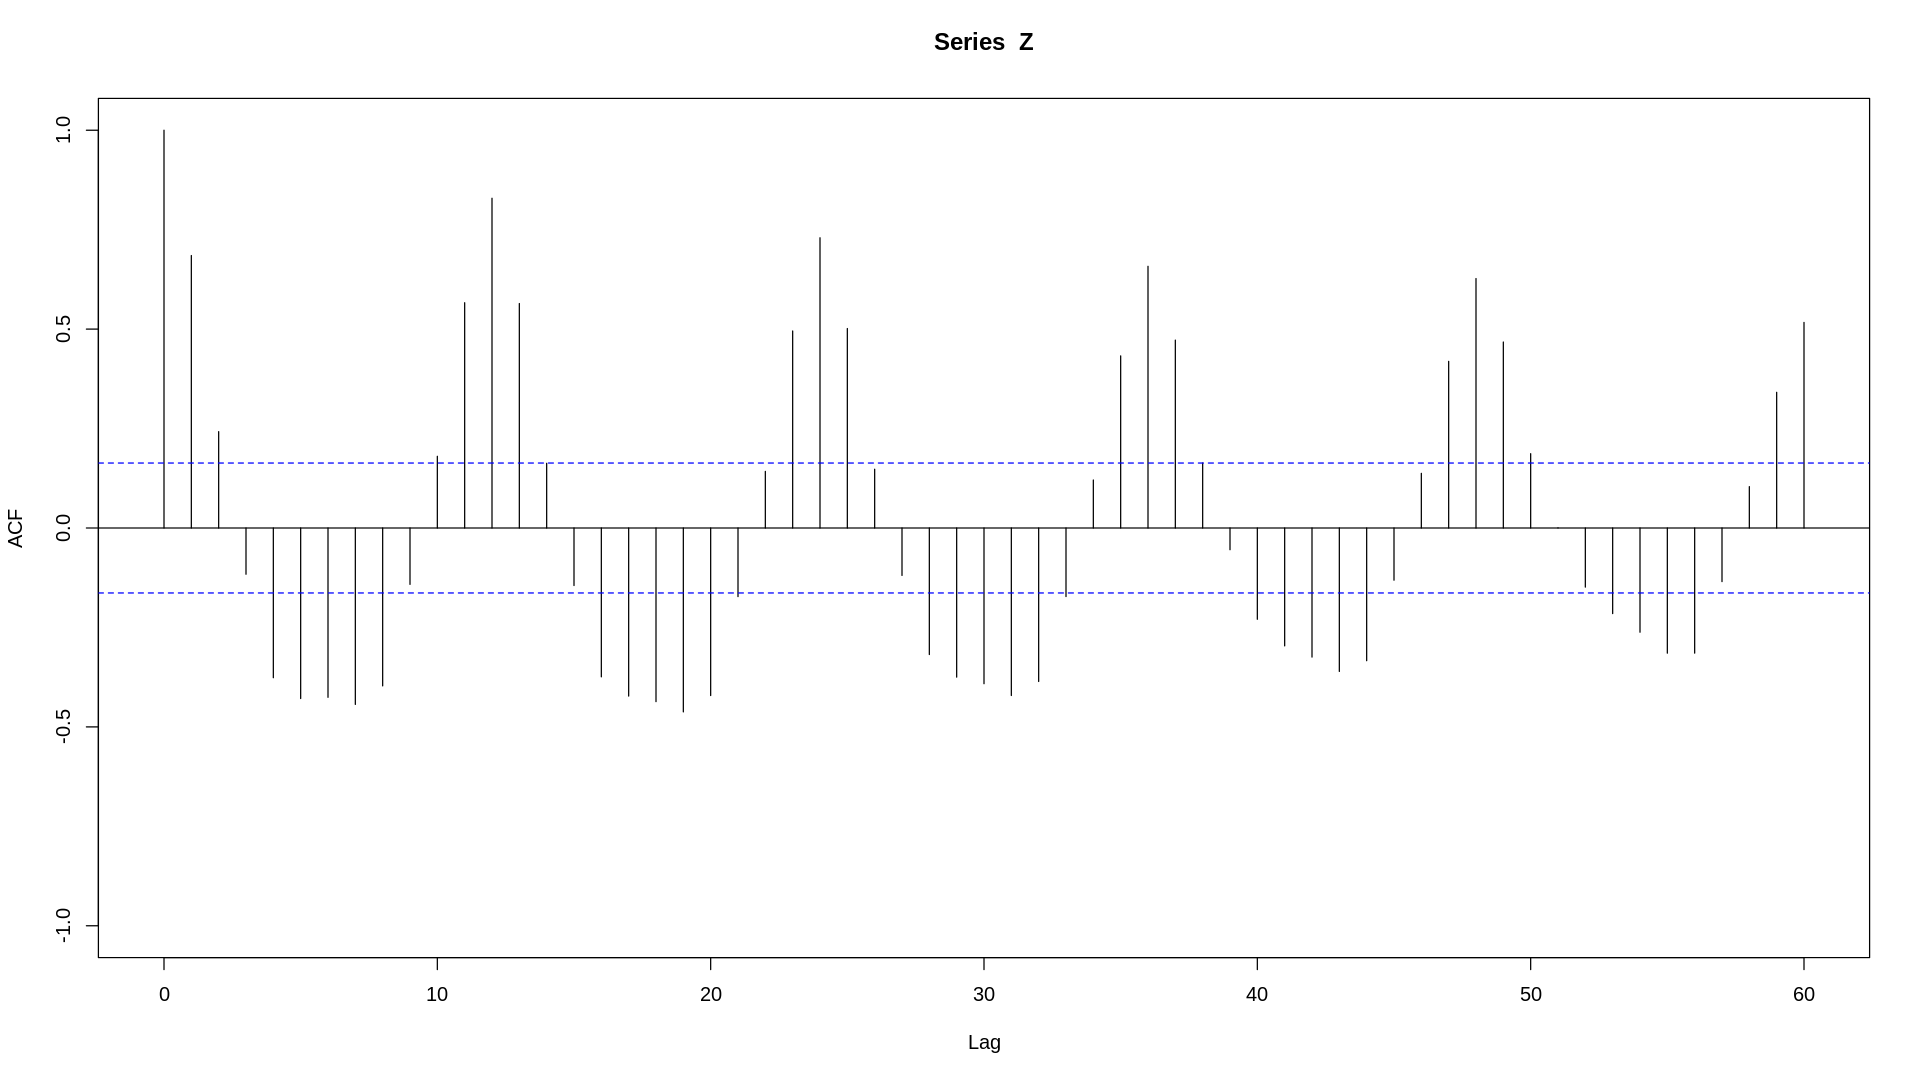

In [ ]:
Z <- Data$Y - modelo2$fitted.values
acf(Z, ylim = c(-1,+1), lag.max = 60)

Modelamiento de la Estacionalidad

[1] 144


Call:
lm(formula = Data$Y ~ I(drift) + I(drift^2) + I(drift^3) + Mes, 
    data = Data)

Coefficients:
(Intercept)     I(drift)   I(drift^2)   I(drift^3)    MesMes_10    MesMes_11  
  4.659e+00    1.251e-02   -9.853e-06   -5.347e-08    9.144e-03   -1.343e-01  
  MesMes_12     MesMes_2     MesMes_3     MesMes_4     MesMes_5     MesMes_6  
 -2.010e-02   -2.216e-02    1.080e-01    7.673e-02    7.438e-02    1.966e-01  
   MesMes_7     MesMes_8     MesMes_9  
  3.006e-01    2.915e-01    1.471e-01  


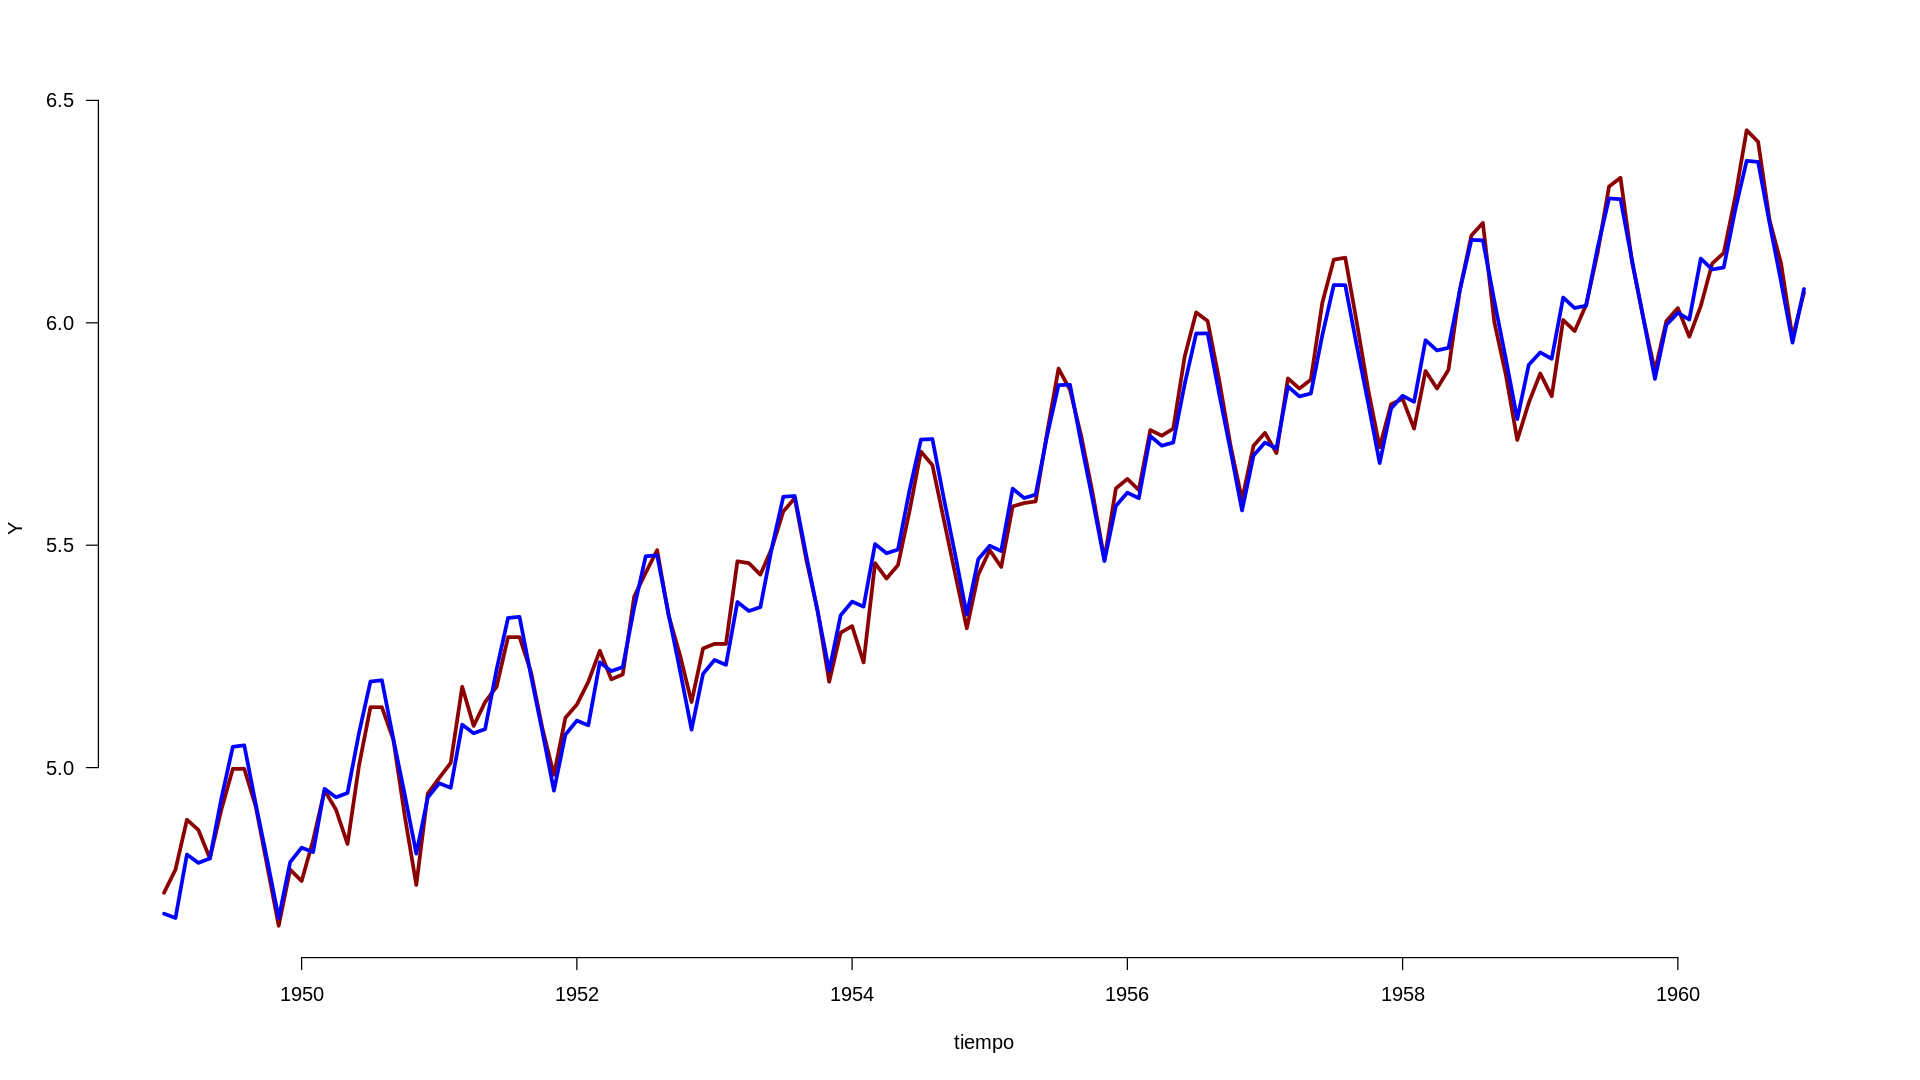

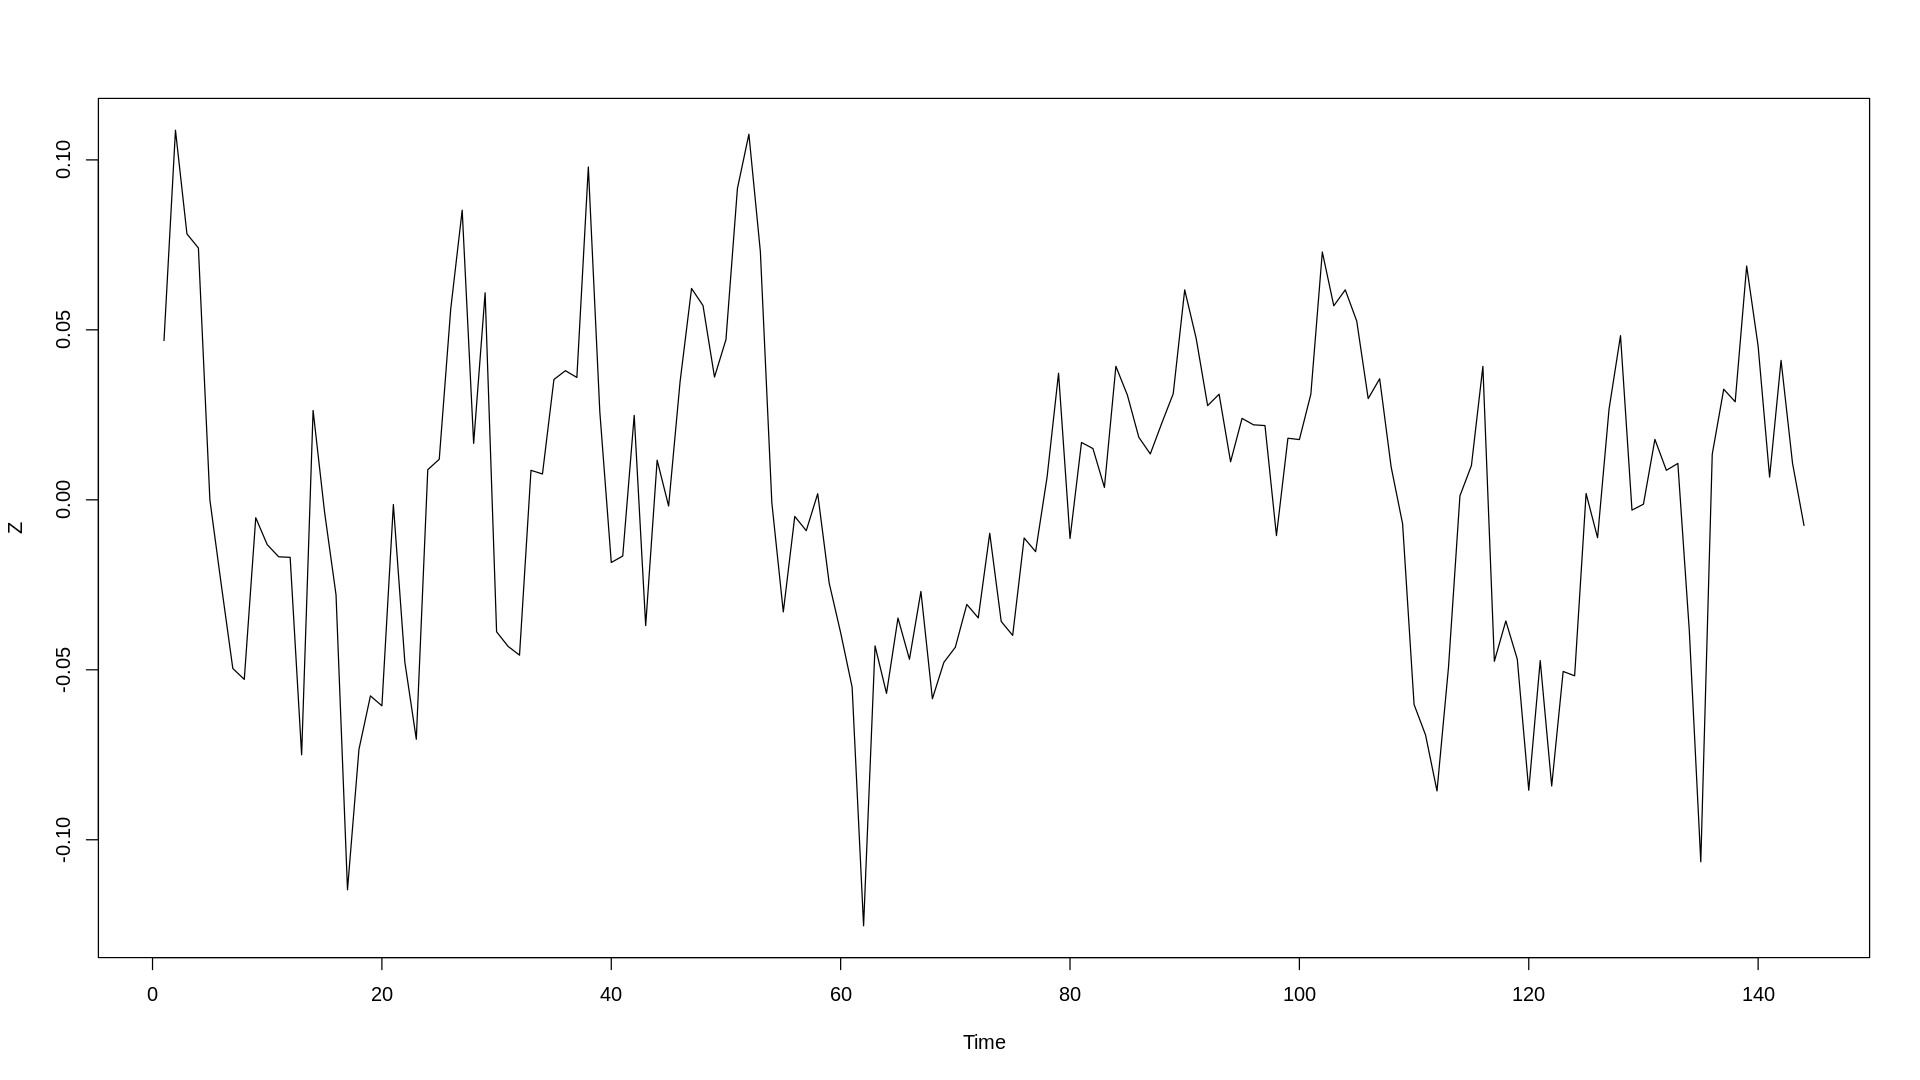

In [ ]:
n <- length(Data$Y)
n
Mes <- paste("Mes_",rep(1:12,12),sep = "")
Data$Mes <- Mes
modelo4 <- lm(Data$Y ~ I(drift)+I(drift^2)+I(drift^3) + Mes, data = Data)
modelo4
plot(Y ~ tiempo, data = Data, type = "l", lwd = 3, col = "darkred", bty = "n", las = 1)
lines(modelo4$fitted.values~Data$tiempo, col = "blue", lwd = 3)
Z <- Data$Y-modelo4$fitted.values
ts.plot(Z)

Difereciación

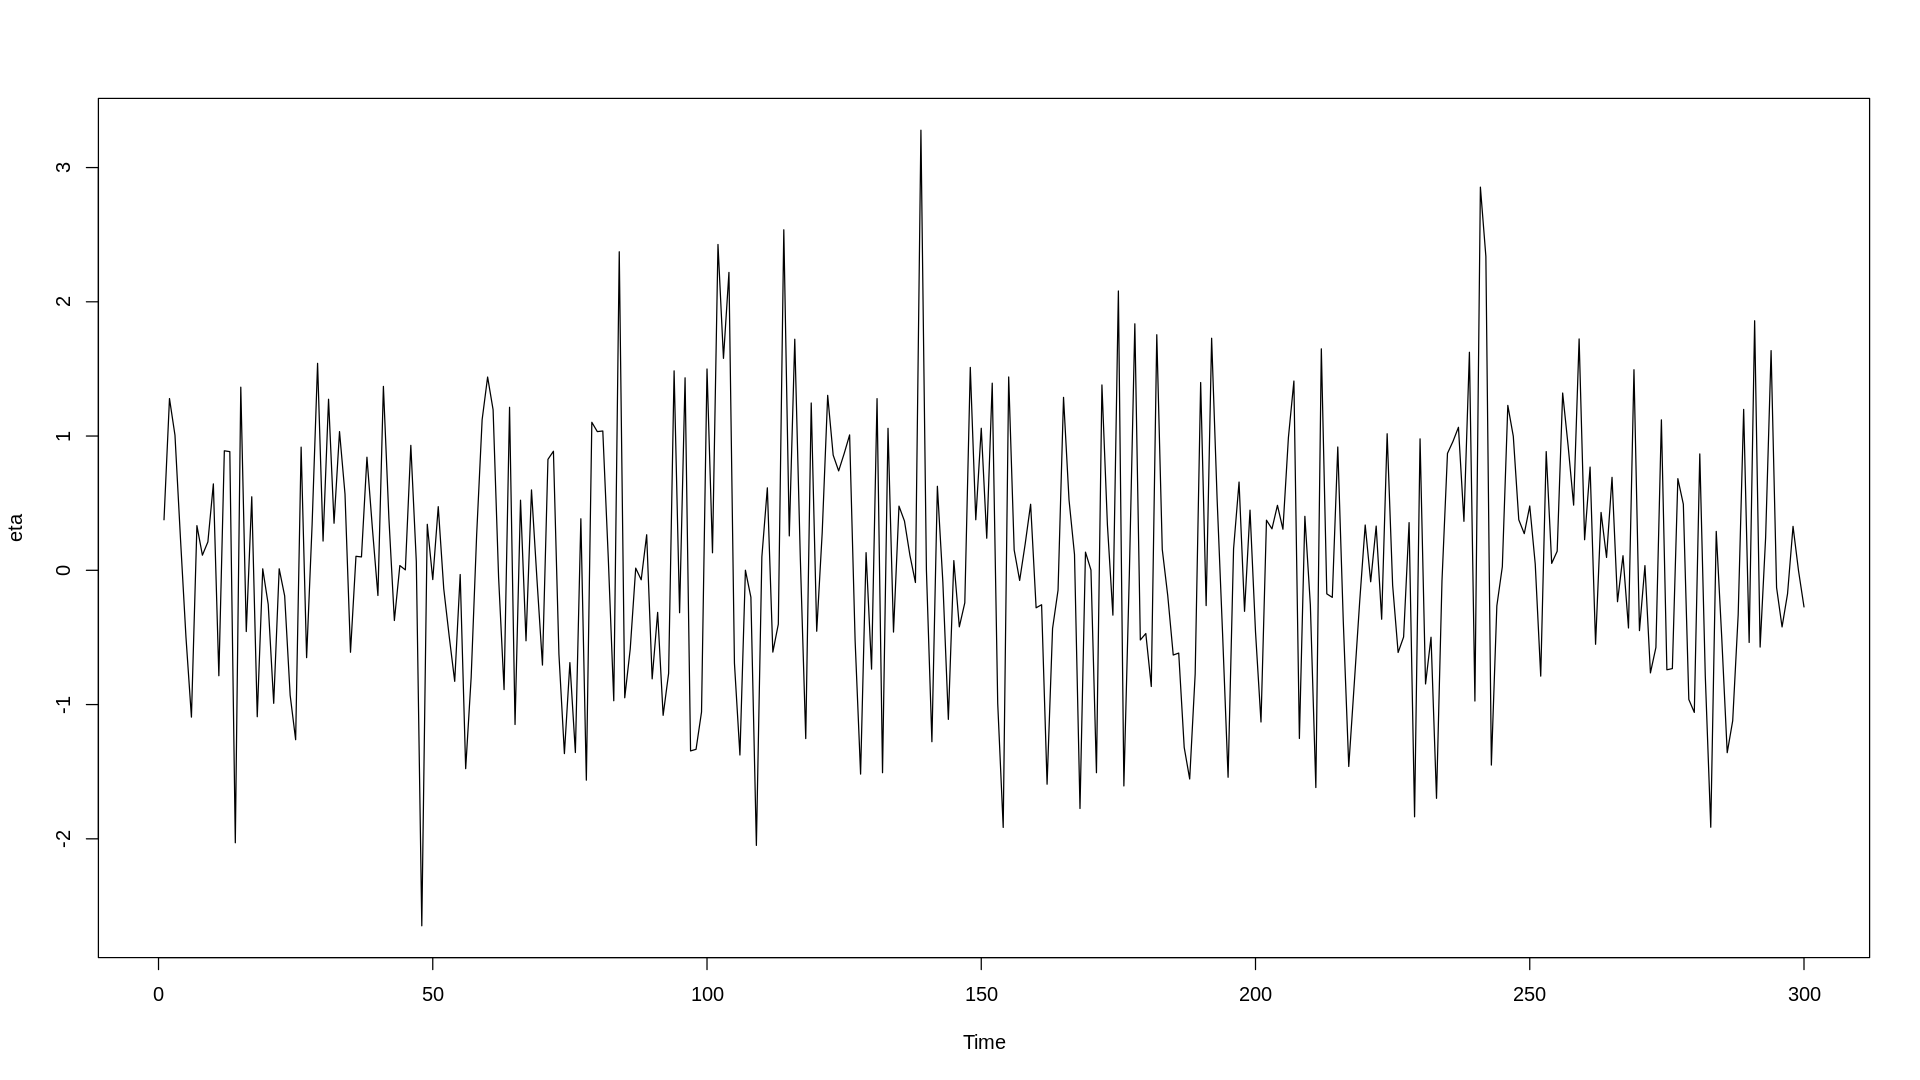

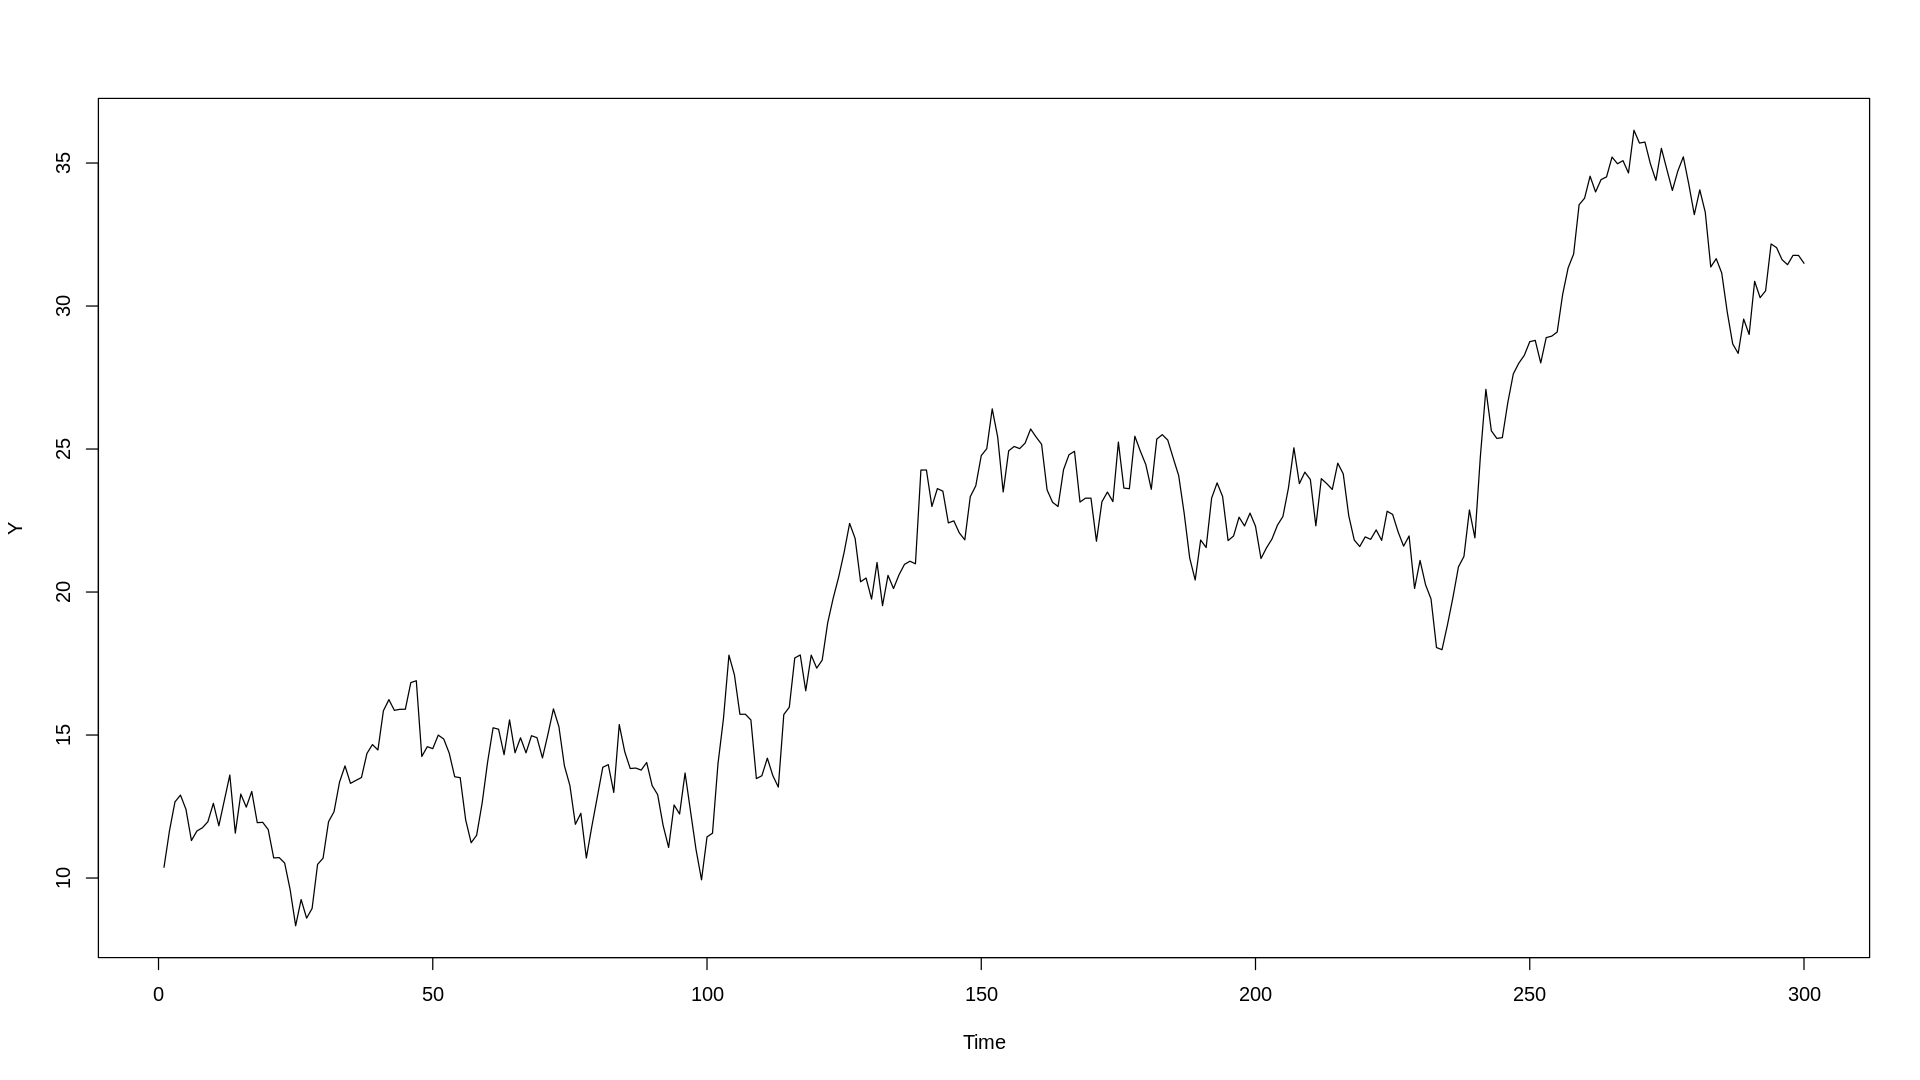

In [ ]:
set.seed(1107)
n <- 300
eta <- rnorm(n)
Y0 <- 10
Y <- Y0 + cumsum(eta)
ts.plot(eta)
ts.plot(Y)

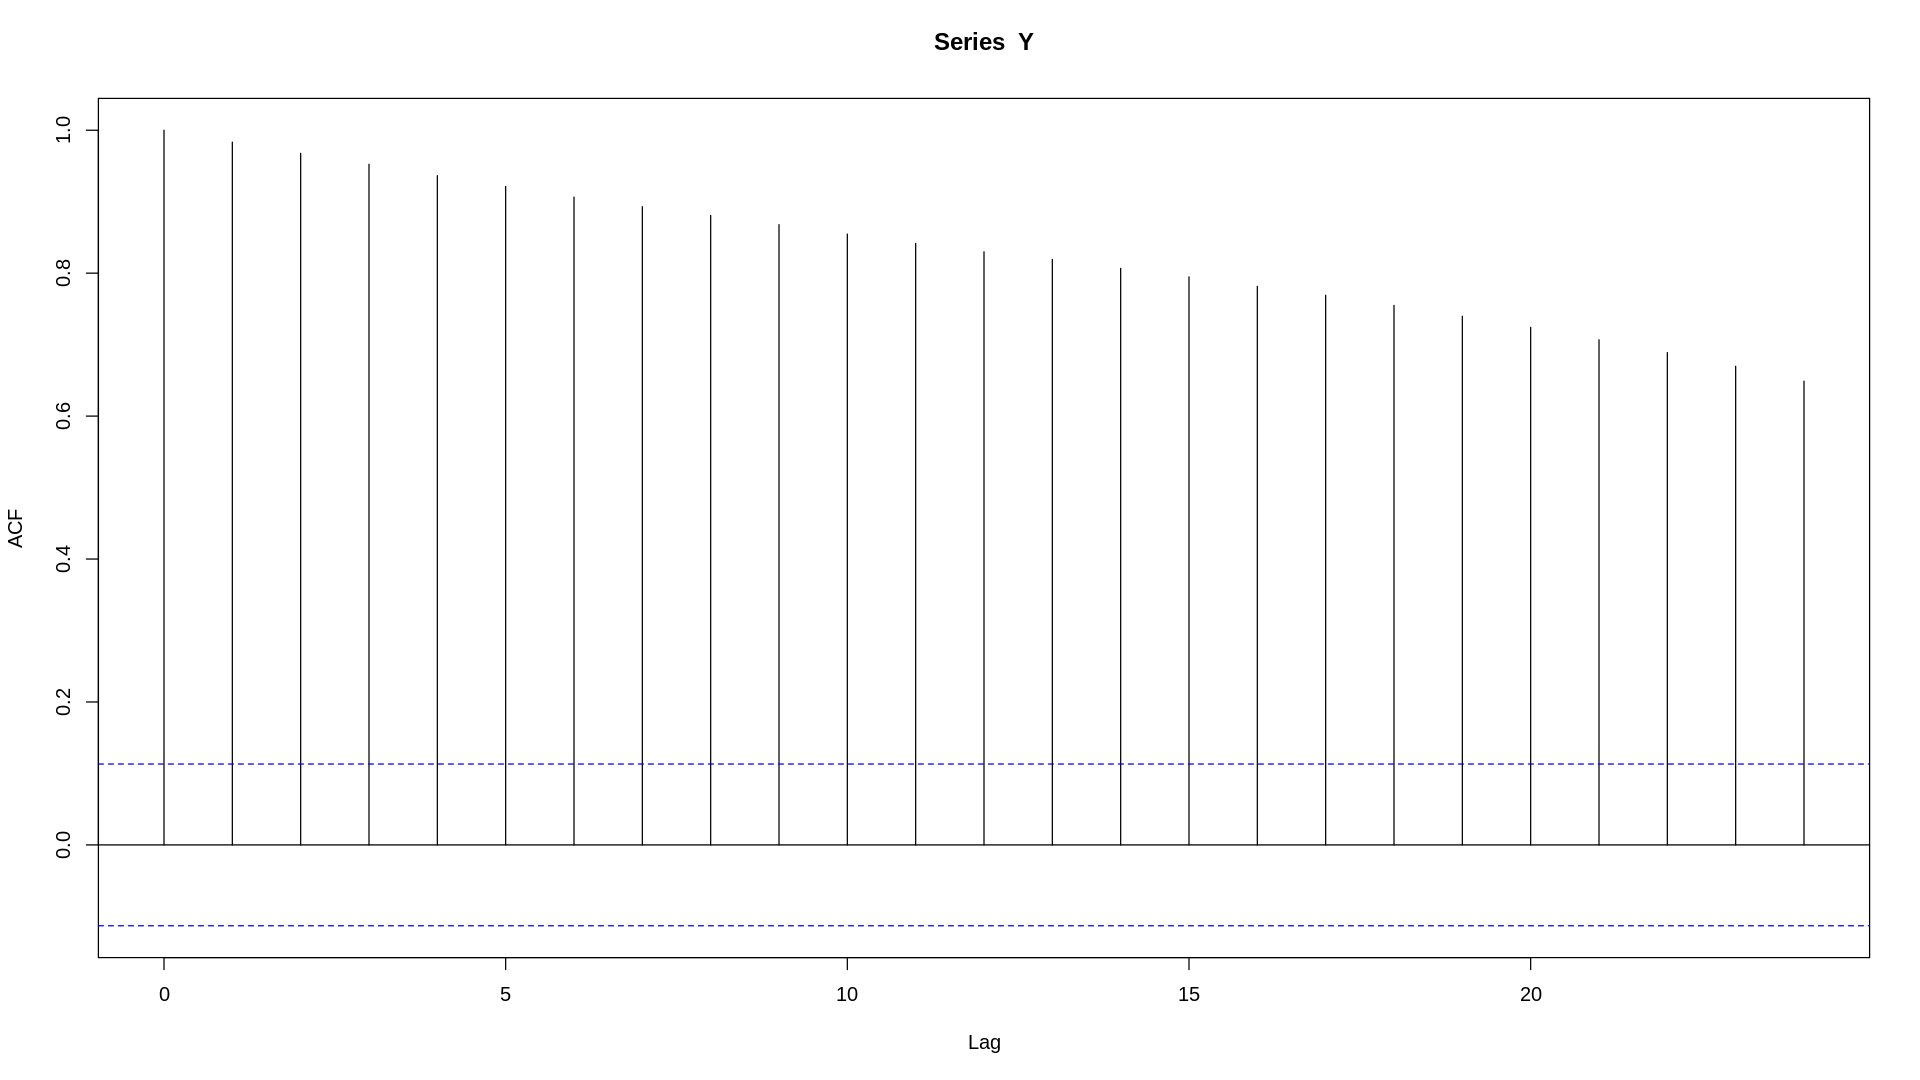

In [ ]:
acf(Y)

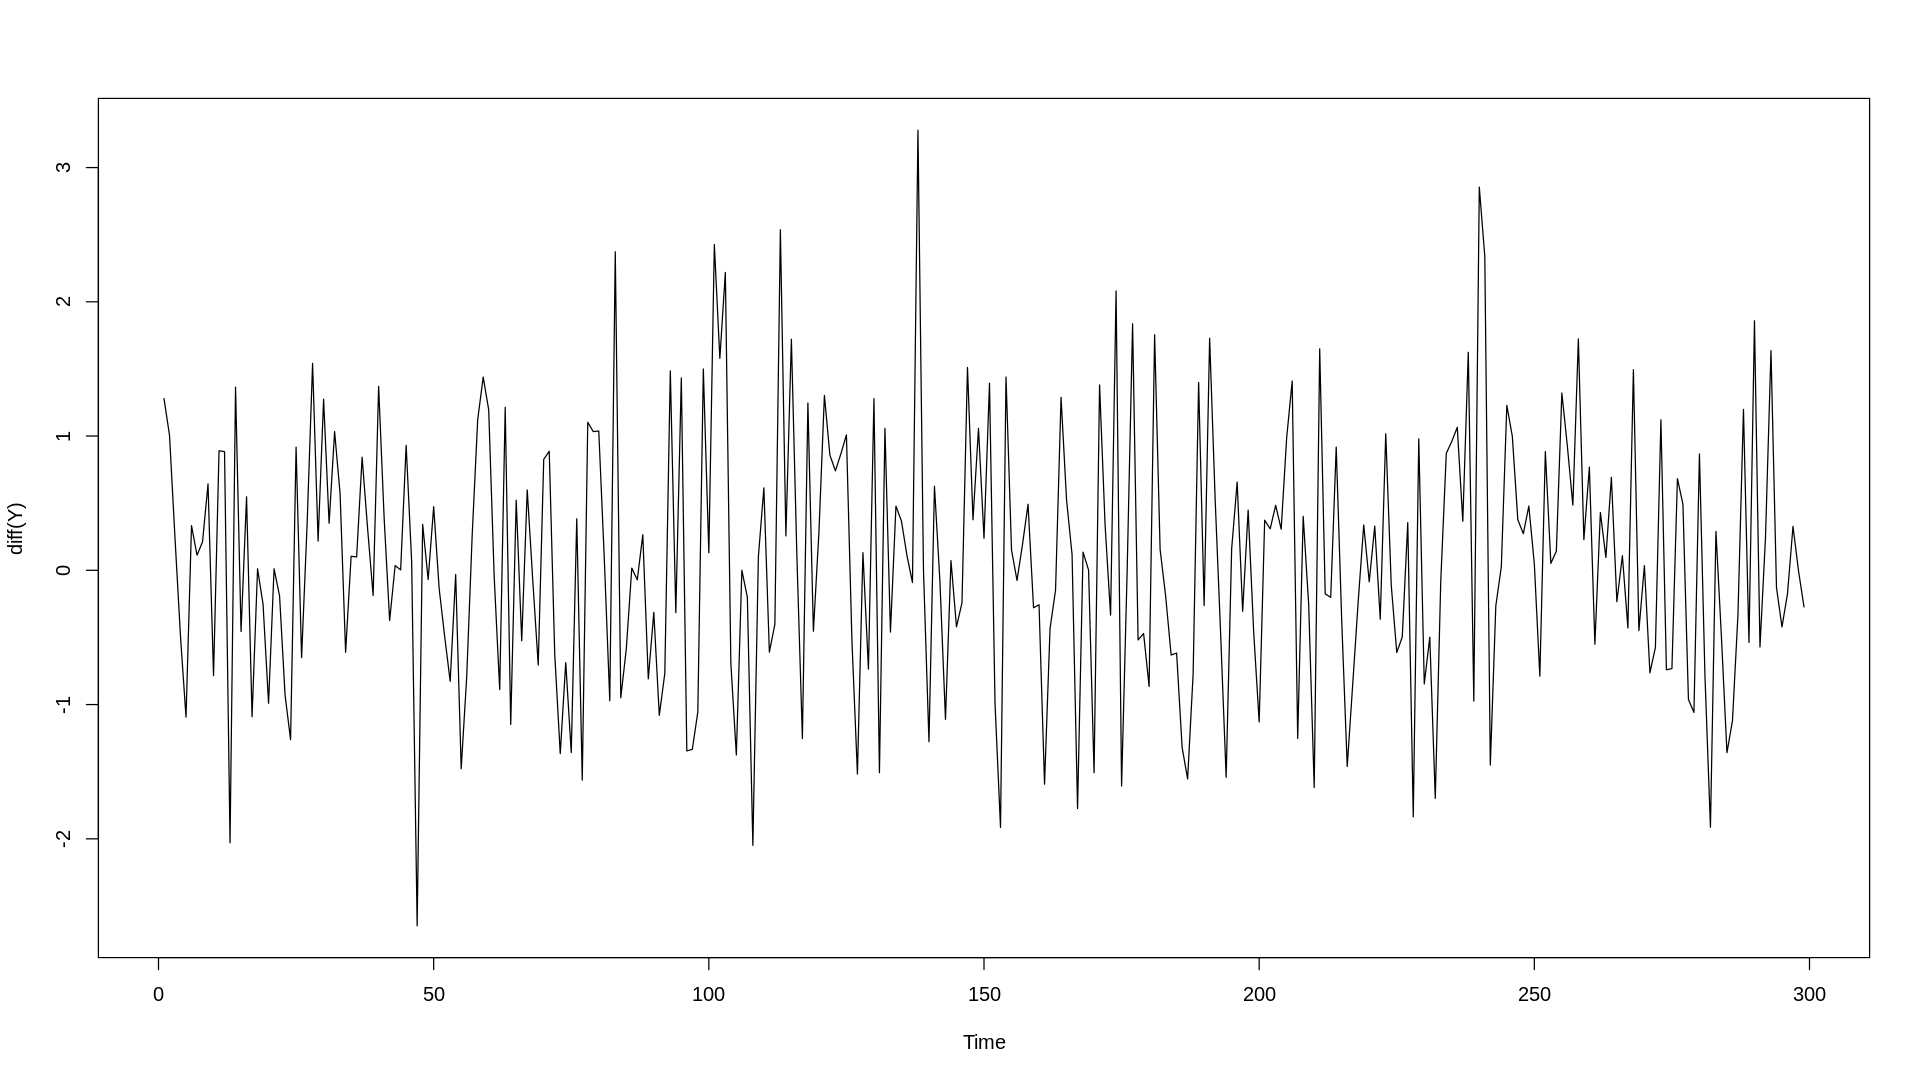

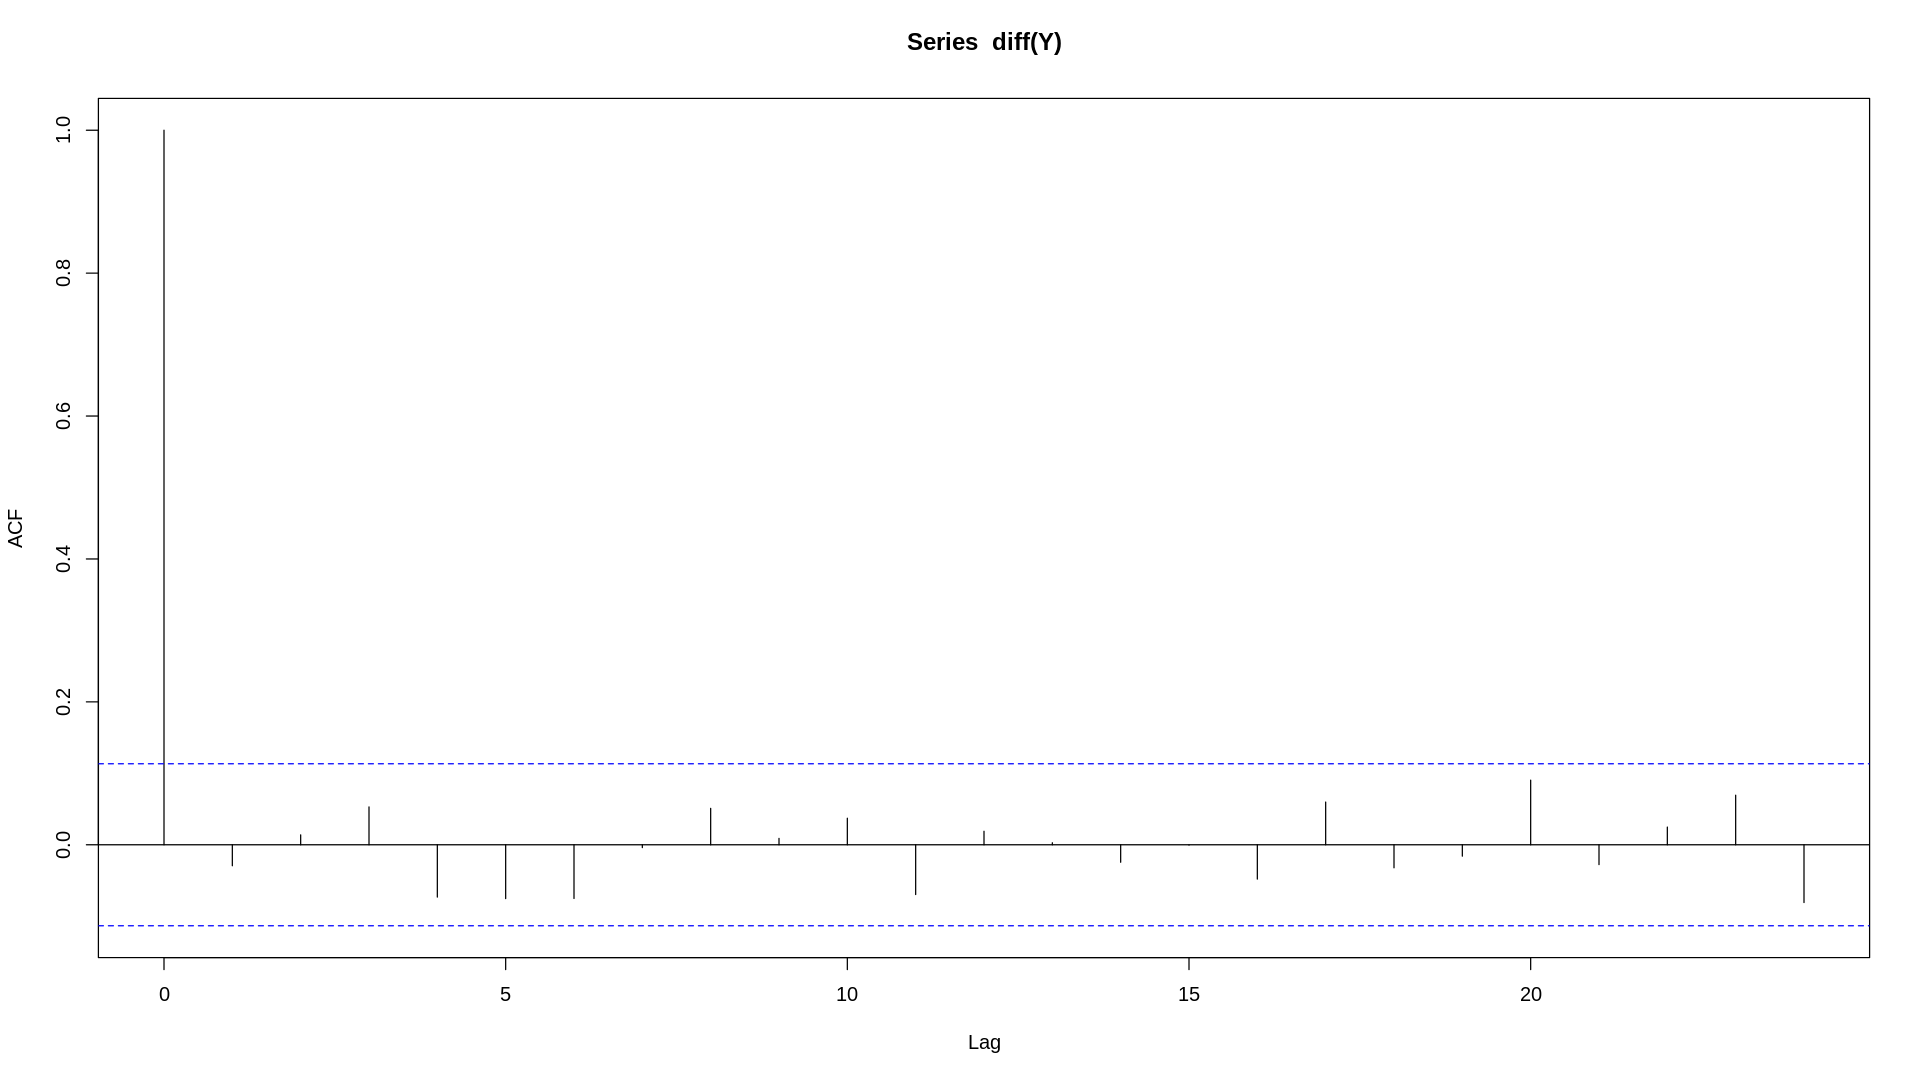

In [ ]:
ts.plot(diff(Y))
acf(diff(Y))

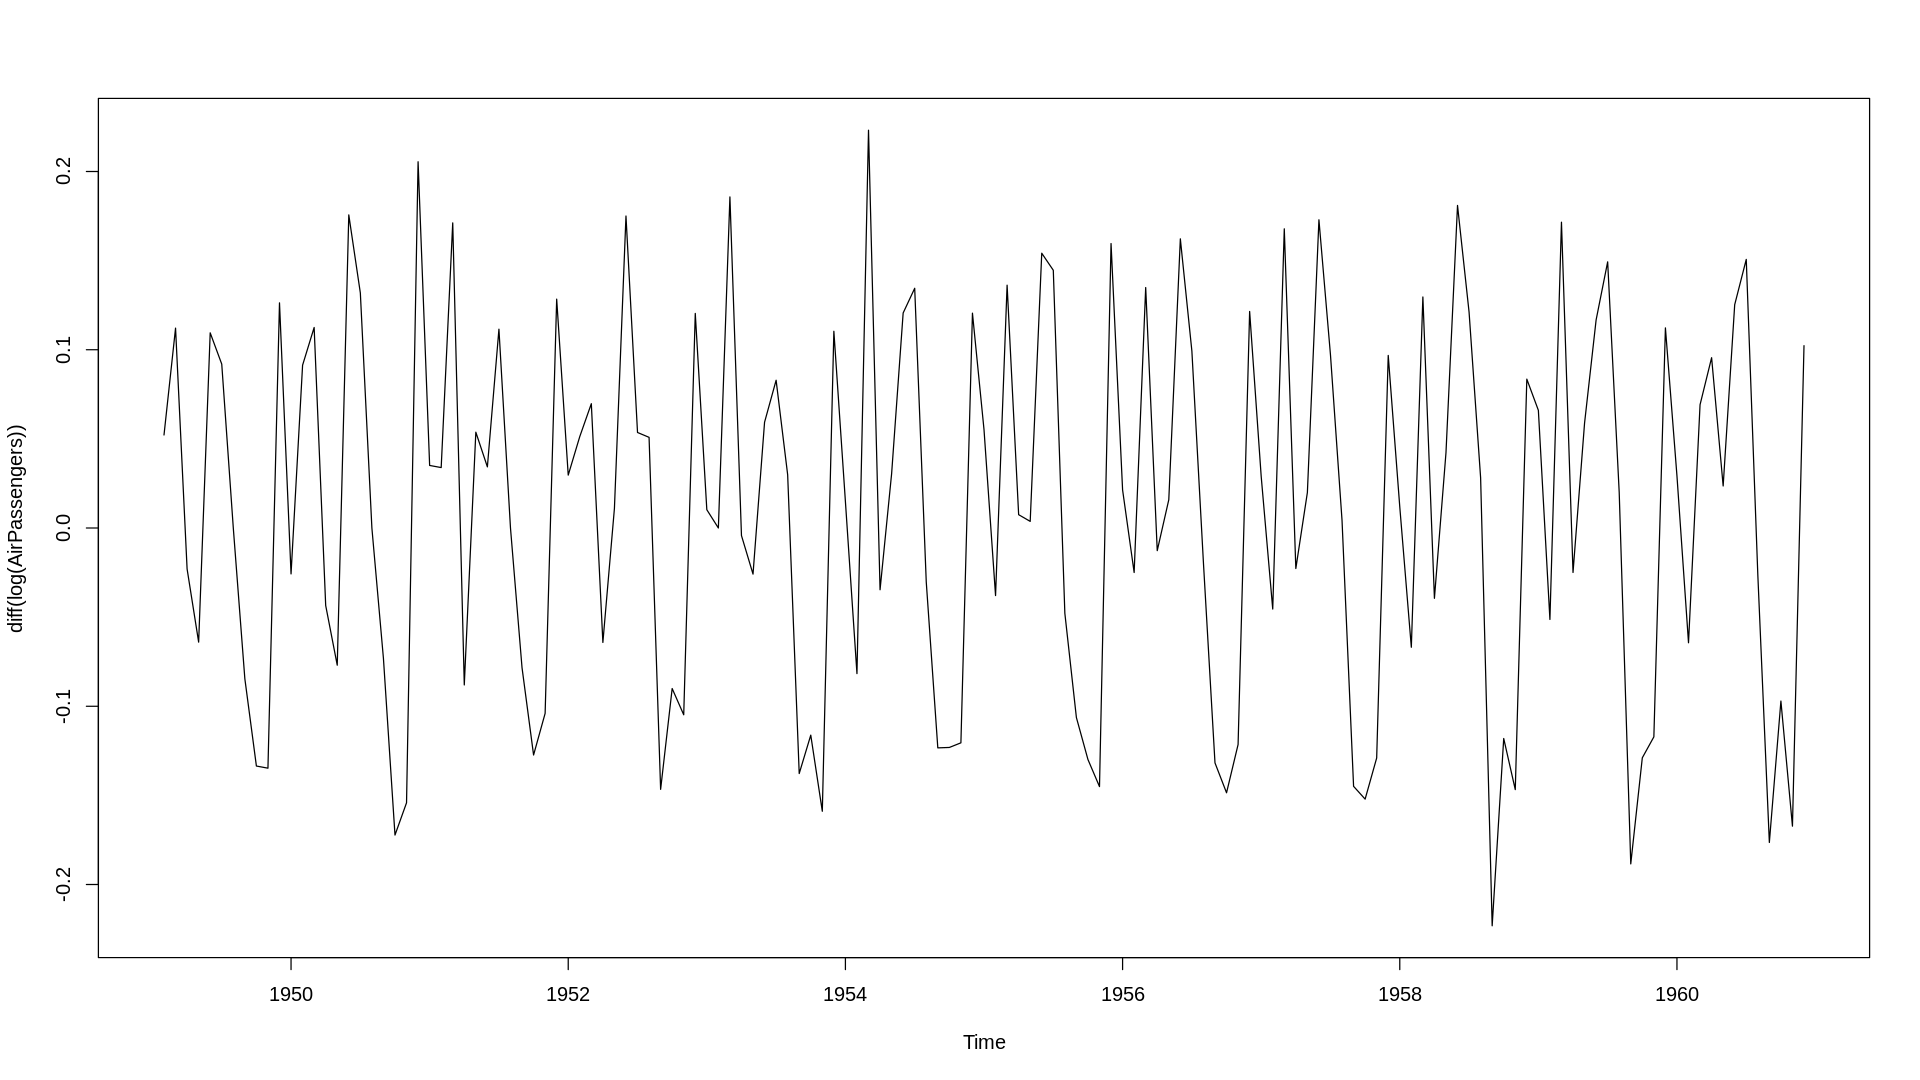

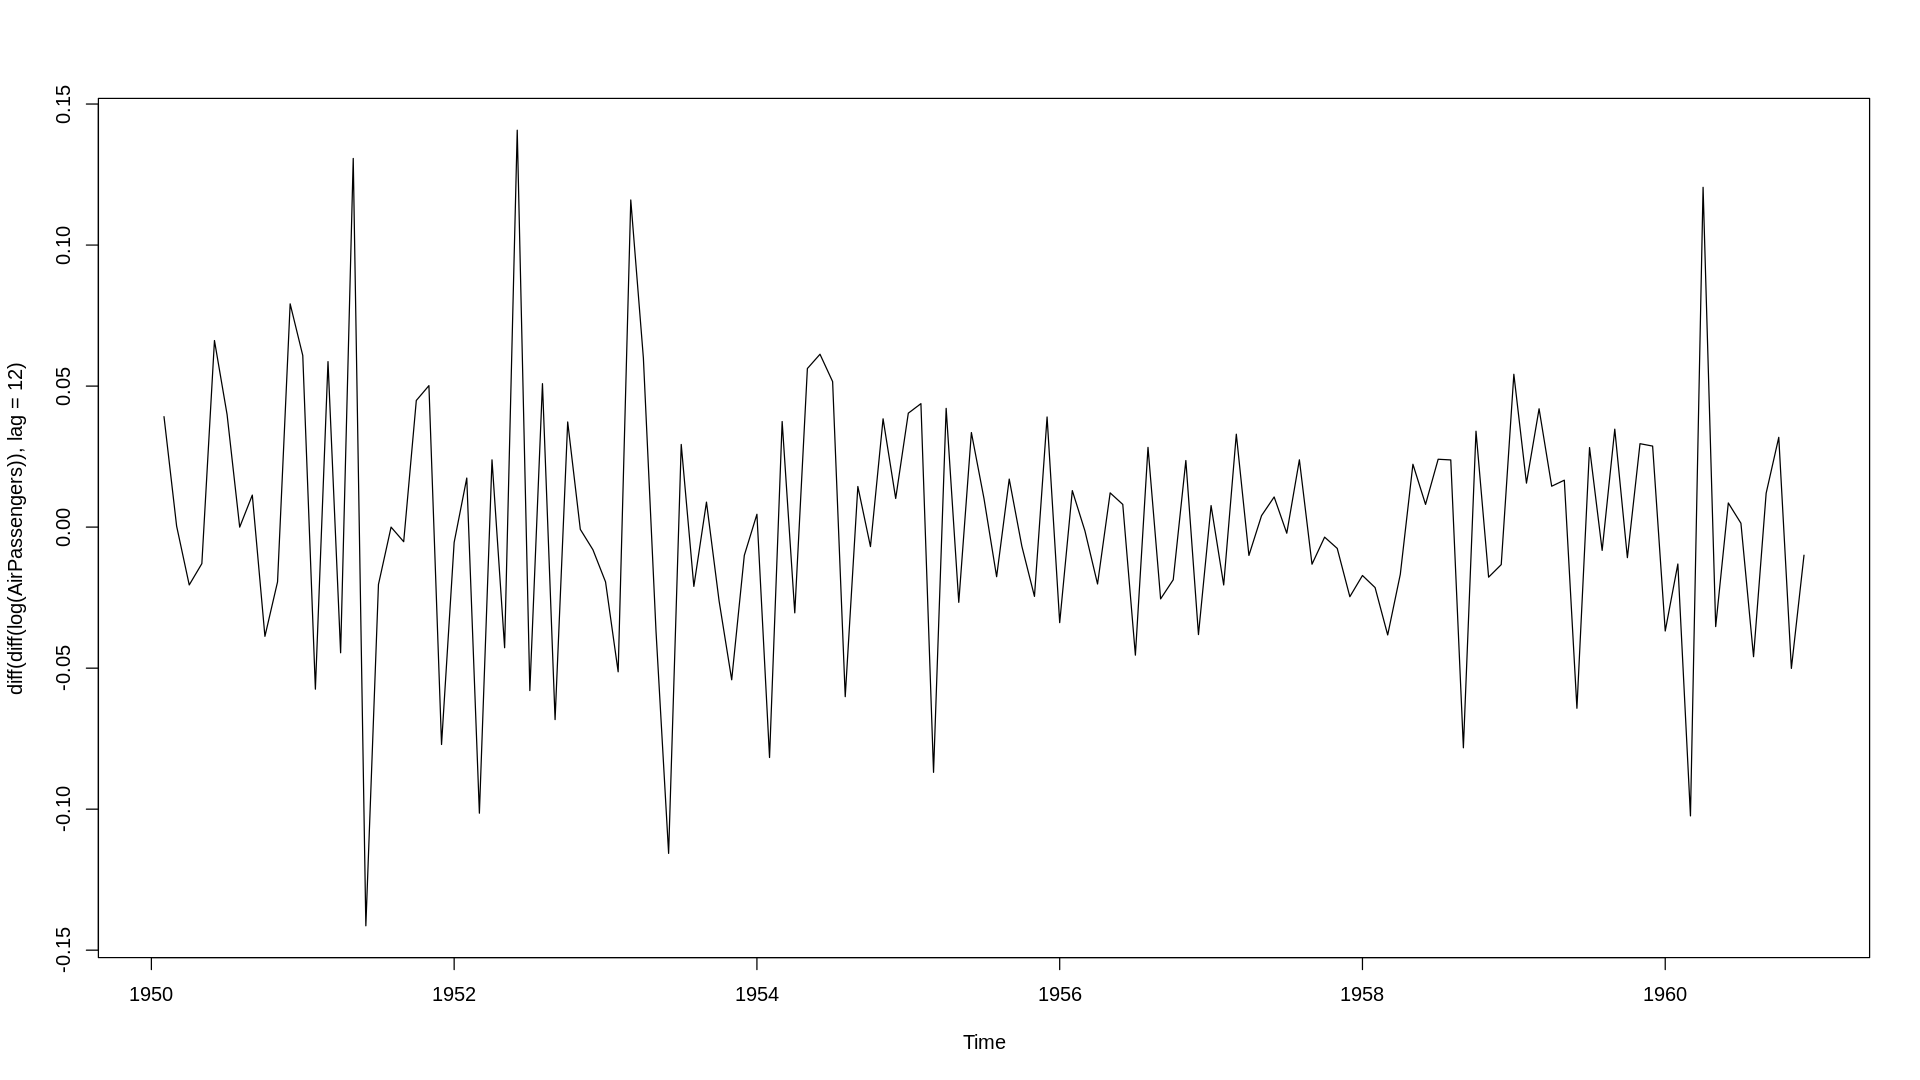

In [ ]:
ts.plot(diff(log(AirPassengers)))
ts.plot(diff(diff(log(AirPassengers)), lag = 12))